In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
#import contextily as ctx
import matplotlib as mpl
#import mapclassify
import pyproj

In [3]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
#import seaborn as sns

In [4]:

import statsmodels.api as sm
from scipy.stats import shapiro

In [5]:
pip install spreg


Note: you may need to restart the kernel to use updated packages.


In [6]:
from spreg import ML_Lag, ML_Error


In [11]:
pm_25=pd.read_csv(r"C:\Users\SKop981040\Documents\unal\Hidrometeorología\pegados pm 2.5\datos_combinados_25.csv")
pm_25.head()

Fecha_Hora  codigoSerial    pm25  calidad_pm25    pm10   
0  2008-03-01 00:00:00            12 -9999.0           1.0 -9999.0  \
1  2008-03-01 01:00:00            12 -9999.0           1.0 -9999.0   
2  2008-03-01 02:00:00            12 -9999.0           1.0 -9999.0   
3  2008-03-01 03:00:00            12 -9999.0           1.0 -9999.0   
4  2008-03-01 04:00:00            12 -9999.0           1.0 -9999.0   

   calidad_pm10     pm1  calidad_pm1      no  calidad_no  ...   p_ssr   
0           1.0 -9999.0          1.0 -9999.0         1.0  ... -9999.0  \
1           1.0 -9999.0          1.0 -9999.0         1.0  ... -9999.0   
2           1.0 -9999.0          1.0 -9999.0         1.0  ... -9999.0   
3           1.0 -9999.0          1.0 -9999.0         1.0  ... -9999.0   
4           1.0 -9999.0          1.0 -9999.0         1.0  ... -9999.0   

   calidad_p_ssr  pliquida_ssr  calidad_pliquida_ssr  rglobal_ssr   
0           4.31       -9999.0                  4.31      -9999.0  \
1           4.31       -9999.0                  4.31      -9999.0   
2           4.31       -9999.0                  4.31      -9999.0   
3           4.31       -9999.0                  4.31      -9999.0   
4           4.31       -9999.0                  4.31      -9999.0   

   calidad_rglobal_ssr  taire10_ssr  calidad_taire10_ssr  vviento_ssr   
0                 4.31      -9999.0                 4.31      -9999.0  \
1                 4.31      -9999.0                 4.31      -9999.0   
2                 4.31      -9999.0                 4.31      -9999.0   
3                 4.31      -9999.0                 4.31      -9999.0   
4                 4.31      -9999.0                 4.31      -9999.0   

   calidad_vviento_ssr  
0                 4.31  
1                 4.31  
2                 4.31  
3                 4.31  
4                 4.31  

[5 rows x 36 columns]

In [12]:
pm_25['calidad_pm25'] = pd.to_numeric(pm_25['calidad_pm25'], errors='coerce')
pm_25['pm25'] = pd.to_numeric(pm_25['pm25'], errors='coerce')


pm25fil =pm_25[
    ~pm_25['calidad_pm25'].between(2.6, 3.9) &  
    (pm_25['calidad_pm25'] < 4.0) &  
    (pm_25['calidad_pm25'] != -9999) &  
    (pm_25['pm25'] >= 0) &  
    (pm_25['pm25'] <= 900) 
]

print(pm25fil.head())

                Fecha_Hora  codigoSerial  pm25  calidad_pm25    pm10   
41580  2012-11-27 12:00:00            12  43.0          -1.0 -9999.0  \
41581  2012-11-27 13:00:00            12  22.0          -1.0 -9999.0   
41582  2012-11-27 14:00:00            12  31.0          -1.0 -9999.0   
41583  2012-11-27 15:00:00            12  29.0          -1.0 -9999.0   
41584  2012-11-27 16:00:00            12  32.0          -1.0 -9999.0   

       calidad_pm10     pm1  calidad_pm1    no  calidad_no  ...   p_ssr   
41580          4.31 -9999.0          1.0  16.5        -1.0  ... -9999.0  \
41581          4.31 -9999.0          1.0  24.9        -1.0  ... -9999.0   
41582          4.31 -9999.0          1.0  26.1        -1.0  ... -9999.0   
41583          4.31 -9999.0          1.0  33.3        -1.0  ... -9999.0   
41584          4.31 -9999.0          1.0  48.3        -1.0  ... -9999.0   

       calidad_p_ssr  pliquida_ssr  calidad_pliquida_ssr  rglobal_ssr   
41580           4.31       -9999.0         

In [13]:
pm25fil=pm25fil.rename(columns={"codigoSerial":"Codigo"})
print(pm25fil.head())

                Fecha_Hora  Codigo  pm25  calidad_pm25    pm10  calidad_pm10   
41580  2012-11-27 12:00:00      12  43.0          -1.0 -9999.0          4.31  \
41581  2012-11-27 13:00:00      12  22.0          -1.0 -9999.0          4.31   
41582  2012-11-27 14:00:00      12  31.0          -1.0 -9999.0          4.31   
41583  2012-11-27 15:00:00      12  29.0          -1.0 -9999.0          4.31   
41584  2012-11-27 16:00:00      12  32.0          -1.0 -9999.0          4.31   

          pm1  calidad_pm1    no  calidad_no  ...   p_ssr  calidad_p_ssr   
41580 -9999.0          1.0  16.5        -1.0  ... -9999.0           4.31  \
41581 -9999.0          1.0  24.9        -1.0  ... -9999.0           4.31   
41582 -9999.0          1.0  26.1        -1.0  ... -9999.0           4.31   
41583 -9999.0          1.0  33.3        -1.0  ... -9999.0           4.31   
41584 -9999.0          1.0  48.3        -1.0  ... -9999.0           4.31   

       pliquida_ssr  calidad_pliquida_ssr  rglobal_ssr  calida

In [14]:
est = pd.read_csv(r"C:\Users\SKop981040\Documents\unal\analisis geoespacial\Estaciones_CalidadAire.csv", encoding='latin1')
print(est)

    Codigo                                           Estacion  Longitud   
0        6  Politecnico Colombiano Jaime Isaza Cadavid - M... -75.57777  \
1       12                            Estación Tráfico Centro -75.56958   
2       28                   Itagüí - Casa de Justicia Itagüí -75.59721   
3       37                       Universidad San Buenaventura -75.56867   
4       38          Itagüí - I.E. Concejo Municipal de Itagüí -75.64436   
5       40                                Parque de las Aguas -75.41949   
6       41                            Universidad de Medellin -75.60996   
7       43                                  Tanque Miraflores -75.54919   
8       46                       Exito San Antonio - Medellin -75.56747   
9       69                   Caldas - E U Joaquín Aristizabal -75.63776   
10      78                             La Estrella - Hospital -75.64417   
11      79     Medellín, Altavista - I.E. Pedro Octavio Amado -75.61060   
12      80  Medellín, Vil

In [15]:
est['geometry'] = est.apply(
    lambda row: Point(row['Longitud'], row['Latitud']),  # Asegúrate de que los nombres de las columnas coincidan
    axis=1
)

estaciones = gpd.GeoDataFrame(est, geometry='geometry', crs="EPSG:4326")  # CRS para coordenadas geográficas (WGS84)

estaciones

Codigo                                           Estacion  Longitud   
0        6  Politecnico Colombiano Jaime Isaza Cadavid - M... -75.57777  \
1       12                            Estación Tráfico Centro -75.56958   
2       28                   Itagüí - Casa de Justicia Itagüí -75.59721   
3       37                       Universidad San Buenaventura -75.56867   
4       38          Itagüí - I.E. Concejo Municipal de Itagüí -75.64436   
5       40                                Parque de las Aguas -75.41949   
6       41                            Universidad de Medellin -75.60996   
7       43                                  Tanque Miraflores -75.54919   
8       46                       Exito San Antonio - Medellin -75.56747   
9       69                   Caldas - E U Joaquín Aristizabal -75.63776   
10      78                             La Estrella - Hospital -75.64417   
11      79     Medellín, Altavista - I.E. Pedro Octavio Amado -75.61060   
12      80  Medellín, Villahermosa - Planta de producción ... -75.54826   
13      81                             Barbosa - Torre Social -75.33040   
14      82           Copacabana - Ciudadela Educativa La Vida -75.50475   
15      83           Medellin, Belén - I.E Pedro Justo Berrio -75.61047   
16      84  Medellín, El Poblado - I.E INEM sede Santa Cat... -75.56095   
17      85  Medellín, San Cristobal - Parque Biblioteca Fe... -75.63643   
18      86               Medellín, Aranjuez - I.E Ciro Mendia -75.55552   
19      87                        Bello - I.E. Fernando Vélez -75.56780   
20      88                  Envigado - E.S.E. Santa Gertrudis -75.58197   
21      90                    Sabaneta - I.E. Rafael J. Mejía -75.62126   
22      92             Itagüí - Estación de Policía Los Gómez -75.61061   
23      94                             Medellín - Santa Elena -75.49847   
24     100           Medellín - Fiscalía General de la Nación -75.57371   
25     101                            Girardota - Tanques EPM -75.44831   
26     103  Estación Parque Biblioteca Tomás Carrasquilla ... -75.58305   
27     104                       Medellín Almacén General EPM -75.58605   
28     106     Medellín - Universidad CES - Barrio el Poblado -75.55185   
29     107    La Estrella - La Tablaza I.E Jose Antonio Galan -75.63194   

    Latitud       Ciudad                   geometry  
0   6.20897     Medellin  POINT (-75.57777 6.20897)  
1   6.25256     Medellin  POINT (-75.56958 6.25256)  
2   6.18567     Medellin  POINT (-75.59721 6.18567)  
3   6.33070        Bello   POINT (-75.56867 6.3307)  
4   6.16850       Itagüí   POINT (-75.64436 6.1685)  
5   6.40671      Barbosa  POINT (-75.41949 6.40671)  
6   6.23018     Medellin  POINT (-75.60996 6.23018)  
7   6.22997     Medellin  POINT (-75.54919 6.22997)  
8   6.24659     Medellin  POINT (-75.56747 6.24659)  
9   6.09308       Caldas  POINT (-75.63776 6.09308)  
10  6.15553  La Estrella  POINT (-75.64417 6.15553)  
11  6.22189     Medellin   POINT (-75.6106 6.22189)  
12  6.25891     Medellin  POINT (-75.54826 6.25891)  
13  6.43696      Barbosa   POINT (-75.3304 6.43696)  
14  6.34536   Copacabana  POINT (-75.50475 6.34536)  
15  6.23723     Medellin  POINT (-75.61047 6.23723)  
16  6.19987     Medellin  POINT (-75.56095 6.19987)  
17  6.27785     Medellin  POINT (-75.63643 6.27785)  
18  6.29048     Medellin  POINT (-75.55552 6.29048)  
19  6.33755        Bello   POINT (-75.5678 6.33755)  
20  6.16868     Envigado  POINT (-75.58197 6.16868)  
21  6.14550     Sabaneta   POINT (-75.62126 6.1455)  
22  6.18989       Itagüí  POINT (-75.61061 6.18989)  
23  6.23636     Medellín  POINT (-75.49847 6.23636)  
24  6.26879     Medellín  POINT (-75.57371 6.26879)  
25  6.37325    Girardota  POINT (-75.44831 6.37325)  
26  6.28500     Medellín    POINT (-75.58305 6.285)  
27  6.22978     Medellín  POINT (-75.58605 6.22978)  
28  6.20739     Medellín  POINT (-75.55185 6.20739)  
29  6.11806  La Estrella  POINT (-75.63194 6.11806)

In [16]:
est_pm25 = pd.merge(estaciones, pm25fil, on="Codigo")
print(est_pm25.head())

   Codigo                 Estacion  Longitud  Latitud    Ciudad   
0      12  Estación Tráfico Centro -75.56958  6.25256  Medellin  \
1      12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
2      12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
3      12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
4      12  Estación Tráfico Centro -75.56958  6.25256  Medellin   

                    geometry           Fecha_Hora  pm25  calidad_pm25    pm10   
0  POINT (-75.56958 6.25256)  2012-11-27 12:00:00  43.0          -1.0 -9999.0  \
1  POINT (-75.56958 6.25256)  2012-11-27 13:00:00  22.0          -1.0 -9999.0   
2  POINT (-75.56958 6.25256)  2012-11-27 14:00:00  31.0          -1.0 -9999.0   
3  POINT (-75.56958 6.25256)  2012-11-27 15:00:00  29.0          -1.0 -9999.0   
4  POINT (-75.56958 6.25256)  2012-11-27 16:00:00  32.0          -1.0 -9999.0   

   ...   p_ssr  calidad_p_ssr  pliquida_ssr  calidad_pliquida_ssr   
0  ... -9999.0           4.31       -9999

In [17]:
#precipitación horaria
est_marzo=pd.read_csv(r"C:\Users\SKop981040\Documents\unal\precipitacion\marzo\csv_combinado.csv")
est_marzo

codigo           fecha_hora   p1     p2  calidad
0         11.0  2022-03-01 00:00:00  0.0  0.000      1.0
1         11.0  2022-03-01 00:01:00  0.0  0.000      1.0
2         11.0  2022-03-01 00:02:00  0.0  0.000      1.0
3         11.0  2022-03-01 00:03:00  0.0  0.254      1.0
4         11.0  2022-03-01 00:04:00  0.0  0.000      1.0
...        ...                  ...  ...    ...      ...
750137     9.0  2022-03-31 23:55:00  0.0  0.000      1.0
750138     9.0  2022-03-31 23:56:00  0.0  0.000      1.0
750139     9.0  2022-03-31 23:57:00  0.0  0.000      1.0
750140     9.0  2022-03-31 23:58:00  0.0  0.000      1.0
750141     9.0  2022-03-31 23:59:00  0.0  0.000      1.0

[750142 rows x 5 columns]

In [18]:
est_marzo['Codigo'] = est_marzo['codigo'].astype(int)
est_marzo['calidad'] = est_marzo['calidad'].astype(int)

In [19]:
filtro = (
    (est_marzo['calidad'].isin([1, 2,151])) &
    (est_marzo['p1'] >= 0) &
    (est_marzo['p2'] >= 0)
)

est_marzof = est_marzo[filtro]
est_marzof

codigo           fecha_hora   p1     p2  calidad  Codigo
0         11.0  2022-03-01 00:00:00  0.0  0.000        1      11
1         11.0  2022-03-01 00:01:00  0.0  0.000        1      11
2         11.0  2022-03-01 00:02:00  0.0  0.000        1      11
3         11.0  2022-03-01 00:03:00  0.0  0.254        1      11
4         11.0  2022-03-01 00:04:00  0.0  0.000        1      11
...        ...                  ...  ...    ...      ...     ...
750137     9.0  2022-03-31 23:55:00  0.0  0.000        1       9
750138     9.0  2022-03-31 23:56:00  0.0  0.000        1       9
750139     9.0  2022-03-31 23:57:00  0.0  0.000        1       9
750140     9.0  2022-03-31 23:58:00  0.0  0.000        1       9
750141     9.0  2022-03-31 23:59:00  0.0  0.000        1       9

[530424 rows x 6 columns]

In [20]:
# Crear una nueva columna 'precipitacion' usando p1, y si está vacía, usar p2
est_marzof['pp'] = est_marzof['p1'].fillna(est_marzof['p2'])

In [21]:

est_marzof['fecha_hora'] = pd.to_datetime(est_marzof['fecha_hora'])

In [22]:
est_marzof = est_marzof.set_index('fecha_hora')

In [23]:
#procesando datos de precipitación horaria 
est_marzofil = (est_marzof.groupby('Codigo').resample('H')['pp'].sum().reset_index().rename(columns={'pp': 'pp_horaria'}))
est_marzofil

Codigo          fecha_hora  pp_horaria
0          9 2022-03-01 00:00:00       0.254
1          9 2022-03-01 01:00:00       0.000
2          9 2022-03-01 02:00:00       0.762
3          9 2022-03-01 03:00:00       1.270
4          9 2022-03-01 04:00:00       0.000
...      ...                 ...         ...
9337     481 2022-03-31 19:00:00       0.254
9338     481 2022-03-31 20:00:00       0.000
9339     481 2022-03-31 21:00:00       0.762
9340     481 2022-03-31 22:00:00       1.524
9341     481 2022-03-31 23:00:00       3.302

[9342 rows x 3 columns]

In [24]:
tempe=pd.read_csv(r"C:\Users\SKop981040\Documents\unal\analisis geoespacial\Temperatura\datos_combinadost.csv")
print(tempe)

        codigo       fecha_hora  temperatura  calidad
0        105.0    3/1/2022 0:00         16.9      1.0
1        105.0    3/1/2022 0:01         16.9      1.0
2        105.0    3/1/2022 0:02         16.9      1.0
3        105.0    3/1/2022 0:03         16.9      1.0
4        105.0    3/1/2022 0:04         16.9      1.0
...        ...              ...          ...      ...
614420    82.0  3/31/2022 23:55         18.6      1.0
614421    82.0  3/31/2022 23:56         18.6      1.0
614422    82.0  3/31/2022 23:57         18.7      1.0
614423    82.0  3/31/2022 23:58         18.7      1.0
614424    82.0  3/31/2022 23:59         18.7      1.0

[614425 rows x 4 columns]


In [25]:
filtrot=(tempe['temperatura'] > 0) 


In [26]:
# ahora voy a coger solo los valores que sean válidos 
Tem_f=tempe[filtrot]
print(Tem_f)

        codigo       fecha_hora  temperatura  calidad
0        105.0    3/1/2022 0:00         16.9      1.0
1        105.0    3/1/2022 0:01         16.9      1.0
2        105.0    3/1/2022 0:02         16.9      1.0
3        105.0    3/1/2022 0:03         16.9      1.0
4        105.0    3/1/2022 0:04         16.9      1.0
...        ...              ...          ...      ...
614420    82.0  3/31/2022 23:55         18.6      1.0
614421    82.0  3/31/2022 23:56         18.6      1.0
614422    82.0  3/31/2022 23:57         18.7      1.0
614423    82.0  3/31/2022 23:58         18.7      1.0
614424    82.0  3/31/2022 23:59         18.7      1.0

[568807 rows x 4 columns]


In [27]:
Tem_f["Codigo"]=Tem_f["codigo"].astype("int64")

In [28]:
Tem_f['fecha_hora'] = pd.to_datetime(Tem_f['fecha_hora'])

In [29]:
Tem_f =Tem_f.set_index('fecha_hora')

In [30]:
Tem_fil = (Tem_f.groupby('Codigo').resample('H')['temperatura'].mean().reset_index())
Tem_fil

Codigo          fecha_hora  temperatura
0         73 2022-03-01 00:00:00    17.395000
1         73 2022-03-01 01:00:00    17.230000
2         73 2022-03-01 02:00:00    17.266667
3         73 2022-03-01 03:00:00    17.300000
4         73 2022-03-01 04:00:00    17.300000
...      ...                 ...          ...
9657     635 2022-01-31 19:00:00    20.625000
9658     635 2022-01-31 20:00:00    19.455000
9659     635 2022-01-31 21:00:00    18.531667
9660     635 2022-01-31 22:00:00    17.995000
9661     635 2022-01-31 23:00:00    17.670000

[9662 rows x 3 columns]

In [31]:
#estaciones meteorologicas 
est_met=pd.read_csv(r"C:\Users\SKop981040\Documents\unal\analisis geoespacial\Est_meteorologicas.csv", encoding="latin-1")
est_met.head()

Codigo                    Estacion  Longitud  Latitud    Ciudad Barrio   
0       1  Casa de Gobierno Altavista -75.62820  6.22260  Medellin    NaN  \
1       2      Escuela Rural La Verde -75.64069  6.18686  Medellin    NaN   
2       3    Escuela Rural Yarumalito -75.69426  6.23309  Medellin    NaN   
3       4  I.E Hector Rogelio Montoya -75.69080  6.34309  Medellin    NaN   
4       5             I.E Santa Elena -75.49214  6.20621  Medellin    NaN   

  Comuna            Corregimiento                      Vereda   
0    NaN             70 Altavista  Altavista - Sector central  \
1    NaN  80 San Antonio de Prado                    La Verde   
2    NaN  80 San Antonio de Prado                  Yarumalito   
3    NaN              50 Palmitas   Palmitas - Sector Central   
4    NaN           90 Santa Elena  Santa Elena Sector Central   

  Fecha_Instalacion  Estado  
0          2/1/2010  Activa  
1          1/6/2010  Activa  
2          1/1/2010  Activa  
3          1/1/2010  Activa  
4          1/1/2010  Activa

In [32]:
est_met=gpd.GeoDataFrame(est_met,geometry=gpd.points_from_xy(est_met['Longitud'], est_met['Latitud']),crs="EPSG:4326")
print(est_met.head)

<bound method NDFrame.head of       Codigo                                           Estacion  Longitud   
0          1                         Casa de Gobierno Altavista -75.62820  \
1          2                             Escuela Rural La Verde -75.64069   
2          3                           Escuela Rural Yarumalito -75.69426   
3          4                         I.E Hector Rogelio Montoya -75.69080   
4          5                                    I.E Santa Elena -75.49214   
...      ...                                                ...       ...   
1525  100954  Antena Mikrotik Camara Nivel La Gallinaza - Vi... -75.53690   
1526  100955                          Camara Nivel La Gallinaza -75.53690   
1527  100956        Antena Mikrotik Camara nivel Q Chorro Hondo -75.54049   
1528  100957                       Camara Nivel Q. Chorro Hondo -75.54049   
1529  100958         Antena Mikrotik Sirena Villatina La Torre  -75.53704   

      Latitud    Ciudad       Barrio Comuna  

In [33]:
# uniendo precipitación para que tenga coordenadas
est_pluvio = pd.merge(est_marzofil, est_met, on='Codigo', how='left')
print(est_pluvio.head())

   Codigo          fecha_hora  pp_horaria                      Estacion   
0       9 2022-03-01 00:00:00       0.254  Instituto Pedro Justo Berrio  \
1       9 2022-03-01 01:00:00       0.000  Instituto Pedro Justo Berrio   
2       9 2022-03-01 02:00:00       0.762  Instituto Pedro Justo Berrio   
3       9 2022-03-01 03:00:00       1.270  Instituto Pedro Justo Berrio   
4       9 2022-03-01 04:00:00       0.000  Instituto Pedro Justo Berrio   

   Longitud  Latitud    Ciudad        Barrio    Comuna Corregimiento Vereda   
0 -75.61093  6.23728  Medellin  Las Mercedes  16 Belen           NaN    NaN  \
1 -75.61093  6.23728  Medellin  Las Mercedes  16 Belen           NaN    NaN   
2 -75.61093  6.23728  Medellin  Las Mercedes  16 Belen           NaN    NaN   
3 -75.61093  6.23728  Medellin  Las Mercedes  16 Belen           NaN    NaN   
4 -75.61093  6.23728  Medellin  Las Mercedes  16 Belen           NaN    NaN   

  Fecha_Instalacion  Estado                   geometry  
0          1/1/20

In [34]:
#uniendo temperatura para que tenga coordenadas
temp = pd.merge(Tem_fil, est_met, on='Codigo', how='inner')
print(temp.head())

   Codigo          fecha_hora  temperatura                     Estacion   
0      73 2022-03-01 00:00:00    17.395000  Ciudadela Educativa La Vida  \
1      73 2022-03-01 01:00:00    17.230000  Ciudadela Educativa La Vida   
2      73 2022-03-01 02:00:00    17.266667  Ciudadela Educativa La Vida   
3      73 2022-03-01 03:00:00    17.300000  Ciudadela Educativa La Vida   
4      73 2022-03-01 04:00:00    17.300000  Ciudadela Educativa La Vida   

   Longitud  Latitud      Ciudad      Barrio Comuna Corregimiento   Vereda   
0 -75.50472  6.34534  Copacabana  Cristo Rey    NaN           NaN  Cabuyal  \
1 -75.50472  6.34534  Copacabana  Cristo Rey    NaN           NaN  Cabuyal   
2 -75.50472  6.34534  Copacabana  Cristo Rey    NaN           NaN  Cabuyal   
3 -75.50472  6.34534  Copacabana  Cristo Rey    NaN           NaN  Cabuyal   
4 -75.50472  6.34534  Copacabana  Cristo Rey    NaN           NaN  Cabuyal   

  Fecha_Instalacion  Estado                   geometry  
0         5/24/2013  Ac

In [35]:
#ahora hacemos el promedio de horas de la cero a 23 
est_pluvio['fecha_hora'] = pd.to_datetime(est_pluvio['fecha_hora'])

# Extraer la hora (de 0 a 23)
est_pluvio['hora'] = est_pluvio['fecha_hora'].dt.hour + 1  # para que sea 1 a 24 en lugar de 0 a 23

# Calcular el promedio por estación y hora
promedios_por_horapp = est_pluvio.groupby(['Codigo', 'hora'])['pp_horaria'].mean().reset_index()

# Ver resultado
promedios_por_horapp

Codigo  hora  pp_horaria
0         9     1    0.491613
1         9     2    0.934065
2         9     3    0.712839
3         9     4    0.319548
4         9     5    0.131097
..      ...   ...         ...
307     481    20    0.950452
308     481    21    0.196645
309     481    22    0.139290
310     481    23    0.335935
311     481    24    1.663290

[312 rows x 3 columns]

In [36]:
info_estacionesestpp =est_pluvio[['Codigo', 'Estacion', 'Ciudad', 'Longitud', 'Latitud']].drop_duplicates(subset='Codigo')
info_estacionesestpp

Codigo                                           Estacion       Ciudad   
0          9                       Instituto Pedro Justo Berrio     Medellin  \
744       11                        Escuela Rural Fabio Zuluaga     Medellin   
1488      19                              Tecnologico Antioquia       Itagui   
2159      30                               Salon Social Barbosa      Barbosa   
2903      33                                Santa Maria Goretti       Caldas   
3400      36                          Colegio Concejo de Itagui       Itagui   
4134      37                               Liceo Fernando Velez        Bello   
4878      56  I.E Inem Jose Felix de Restrepo Sede Santa Cat...     Medellin   
5622      71                                               CEFA     Medellin   
6366      73                        Ciudadela Educativa La Vida   Copacabana   
7110     392         Universidad San Buenaventura - Pluviometro        Bello   
7854     434                   Museo de Antioquia - Pluviometro     Medellin   
8598     481                 Hospital La Estrella - Pluviometro  La Estrella   

      Longitud  Latitud  
0    -75.61093  6.23728  
744  -75.65164  6.27313  
1488 -75.60374  6.17832  
2159 -75.33045  6.43687  
2903 -75.63747  6.09446  
3400 -75.64380  6.16793  
4134 -75.56780  6.33755  
4878 -75.56096  6.19978  
5622 -75.56183  6.24651  
6366 -75.50472  6.34534  
7110 -75.57007  6.33093  
7854 -75.56966  6.25277  
8598 -75.64398  6.15546

In [37]:
promedios_por_horapp=pd.merge(info_estacionesestpp,promedios_por_horapp, on='Codigo', how='left')
promedios_por_horapp

Codigo                            Estacion       Ciudad  Longitud   
0         9        Instituto Pedro Justo Berrio     Medellin -75.61093  \
1         9        Instituto Pedro Justo Berrio     Medellin -75.61093   
2         9        Instituto Pedro Justo Berrio     Medellin -75.61093   
3         9        Instituto Pedro Justo Berrio     Medellin -75.61093   
4         9        Instituto Pedro Justo Berrio     Medellin -75.61093   
..      ...                                 ...          ...       ...   
307     481  Hospital La Estrella - Pluviometro  La Estrella -75.64398   
308     481  Hospital La Estrella - Pluviometro  La Estrella -75.64398   
309     481  Hospital La Estrella - Pluviometro  La Estrella -75.64398   
310     481  Hospital La Estrella - Pluviometro  La Estrella -75.64398   
311     481  Hospital La Estrella - Pluviometro  La Estrella -75.64398   

     Latitud  hora  pp_horaria  
0    6.23728     1    0.491613  
1    6.23728     2    0.934065  
2    6.23728     3    0.712839  
3    6.23728     4    0.319548  
4    6.23728     5    0.131097  
..       ...   ...         ...  
307  6.15546    20    0.950452  
308  6.15546    21    0.196645  
309  6.15546    22    0.139290  
310  6.15546    23    0.335935  
311  6.15546    24    1.663290  

[312 rows x 7 columns]

In [38]:
# lo mismo para pm25
est_pm25 ['Fecha_Hora'] = pd.to_datetime(est_pm25 ['Fecha_Hora'])

# Extraer la hora (de 0 a 23)
est_pm25['hora'] = est_pm25['Fecha_Hora'].dt.hour + 1  # para que sea 1 a 24 en lugar de 0 a 23

# Calcular el promedio por estación y hora
promedios_por_horapm25 = est_pm25.groupby(['Codigo', 'hora'])['pm25'].mean().reset_index()

# Ver resultado
print(promedios_por_horapm25.head())

   Codigo  hora       pm25
0      12     1  28.026581
1      12     2  27.870992
2      12     3  27.077382
3      12     4  26.379148
4      12     5  26.380198


In [39]:
info_estacionesestpm25 =est_pm25[['Codigo', 'Estacion', 'Ciudad', 'Longitud', 'Latitud']].drop_duplicates(subset='Codigo')
info_estacionesestpm25

Codigo                                           Estacion   
0            12                            Estación Tráfico Centro  \
194998       38          Itagüí - I.E. Concejo Municipal de Itagüí   
398882       69                   Caldas - E U Joaquín Aristizabal   
510060       78                             La Estrella - Hospital   
634004       79     Medellín, Altavista - I.E. Pedro Octavio Amado   
754420       80  Medellín, Villahermosa - Planta de producción ...   
874154       81                             Barbosa - Torre Social   
989170       82           Copacabana - Ciudadela Educativa La Vida   
1109608      83           Medellin, Belén - I.E Pedro Justo Berrio   
1229588      84  Medellín, El Poblado - I.E INEM sede Santa Cat...   
1348712      85  Medellín, San Cristobal - Parque Biblioteca Fe...   
1467660      87                        Bello - I.E. Fernando Vélez   
1585656      88                  Envigado - E.S.E. Santa Gertrudis   
1704290      90                    Sabaneta - I.E. Rafael J. Mejía   
1815354      94                             Medellín - Santa Elena   

              Ciudad  Longitud  Latitud  
0           Medellin -75.56958  6.25256  
194998        Itagüí -75.64436  6.16850  
398882        Caldas -75.63776  6.09308  
510060   La Estrella -75.64417  6.15553  
634004      Medellin -75.61060  6.22189  
754420      Medellin -75.54826  6.25891  
874154       Barbosa -75.33040  6.43696  
989170    Copacabana -75.50475  6.34536  
1109608     Medellin -75.61047  6.23723  
1229588     Medellin -75.56095  6.19987  
1348712     Medellin -75.63643  6.27785  
1467660        Bello -75.56780  6.33755  
1585656     Envigado -75.58197  6.16868  
1704290     Sabaneta -75.62126  6.14550  
1815354     Medellín -75.49847  6.23636

In [40]:
promedios_por_horapm25=pd.merge(info_estacionesestpm25,promedios_por_horapm25, on='Codigo', how='left')
promedios_por_horapm25

Codigo                 Estacion    Ciudad  Longitud  Latitud  hora   
0        12  Estación Tráfico Centro  Medellin -75.56958  6.25256     1  \
1        12  Estación Tráfico Centro  Medellin -75.56958  6.25256     2   
2        12  Estación Tráfico Centro  Medellin -75.56958  6.25256     3   
3        12  Estación Tráfico Centro  Medellin -75.56958  6.25256     4   
4        12  Estación Tráfico Centro  Medellin -75.56958  6.25256     5   
..      ...                      ...       ...       ...      ...   ...   
355      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    20   
356      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    21   
357      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    22   
358      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    23   
359      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    24   

          pm25  
0    28.026581  
1    27.870992  
2    27.077382  
3    26.379148  
4    26.380198  
..         ...  
355  11.010333  
356  12.649717  
357  12.676909  
358  11.904949  
359  10.743358  

[360 rows x 7 columns]

In [41]:
# lo mismo para temperatura
temp['fecha_hora'] = pd.to_datetime(temp['fecha_hora'])

# Extraer la hora (de 0 a 23)
temp['hora'] = temp['fecha_hora'].dt.hour + 1  # para que sea 1 a 24 en lugar de 0 a 23

# Calcular el promedio por estación y hora
promedios_por_horatemp = temp.groupby(['Codigo', 'hora'])['temperatura'].mean().reset_index()

# Ver resultado
promedios_por_horatemp

Codigo  hora  temperatura
0        73     1    18.433441
1        73     2    18.160376
2        73     3    17.963387
3        73     4    17.821828
4        73     5    17.648978
..      ...   ...          ...
307     635    20    19.006232
308     635    21    18.429058
309     635    22    18.072536
310     635    23    17.692609
311     635    24    17.311995

[312 rows x 3 columns]

In [42]:
info_estacionestem = temp[['Codigo', 'Estacion', 'Ciudad', 'Longitud', 'Latitud']].drop_duplicates(subset='Codigo')

In [43]:
info_estacionestem

Codigo                                           Estacion       Ciudad   
0         73                        Ciudadela Educativa La Vida   Copacabana  \
744       82                            I.E Manuel Jose Caicedo      Barbosa   
1488     105                                     Parque 3 Aguas       Caldas   
2232     249                                    Escuela CEDEPRO     Medellin   
2976     252                  Alcaldia Envigado - Meteorologica     Envigado   
3720     318                Institucion Rafael J. Mejia - Thies     Sabaneta   
4464     355             Escuela Piedras Gordas - Meteorologica     Medellin   
5208     362                                 Proyecto Amsterdam     Medellin   
5952     367                    Joaquin Vallejo - Meteorologica     Medellin   
6696     397                         Concejo de Itagui - Thiess       Itagui   
7430     399  Institucion Educativa Jesus Maria Valle - Mete...     Medellin   
8174     419                Thies SENA Medellin - Meteorologica     Medellin   
8918     635       Alcaldia La Estrella - Meteorologica Vaisala  La Estrella   

      Longitud  Latitud  
0    -75.50472  6.34534  
744  -75.32665  6.43495  
1488 -75.63536  6.09628  
2232 -75.63624  6.21959  
2976 -75.58830  6.16990  
3720 -75.62139  6.14564  
4464 -75.49844  6.23637  
5208 -75.55740  6.20136  
5952 -75.54248  6.25525  
6696 -75.64380  6.16793  
7430 -75.58223  6.30053  
8174 -75.57471  6.25551  
8918 -75.64172  6.15822

In [44]:
promedios_por_horatemp=pd.merge(promedios_por_horatemp,info_estacionestem, on='Codigo', how='left')
promedios_por_horatemp

Codigo  hora  temperatura                                      Estacion   
0        73     1    18.433441                   Ciudadela Educativa La Vida  \
1        73     2    18.160376                   Ciudadela Educativa La Vida   
2        73     3    17.963387                   Ciudadela Educativa La Vida   
3        73     4    17.821828                   Ciudadela Educativa La Vida   
4        73     5    17.648978                   Ciudadela Educativa La Vida   
..      ...   ...          ...                                           ...   
307     635    20    19.006232  Alcaldia La Estrella - Meteorologica Vaisala   
308     635    21    18.429058  Alcaldia La Estrella - Meteorologica Vaisala   
309     635    22    18.072536  Alcaldia La Estrella - Meteorologica Vaisala   
310     635    23    17.692609  Alcaldia La Estrella - Meteorologica Vaisala   
311     635    24    17.311995  Alcaldia La Estrella - Meteorologica Vaisala   

          Ciudad  Longitud  Latitud  
0     Copacabana -75.50472  6.34534  
1     Copacabana -75.50472  6.34534  
2     Copacabana -75.50472  6.34534  
3     Copacabana -75.50472  6.34534  
4     Copacabana -75.50472  6.34534  
..           ...       ...      ...  
307  La Estrella -75.64172  6.15822  
308  La Estrella -75.64172  6.15822  
309  La Estrella -75.64172  6.15822  
310  La Estrella -75.64172  6.15822  
311  La Estrella -75.64172  6.15822  

[312 rows x 7 columns]

In [45]:
# colocar geometria en los dataframes
promedios_por_horatemp['geometry'] = promedios_por_horatemp.apply(
    lambda row: Point(row['Longitud'], row['Latitud']), axis=1
)

# Convertir a GeoDataFrame
promedios_por_horatemp= gpd.GeoDataFrame(promedios_por_horatemp, geometry='geometry')


promedios_por_horatemp.set_crs(epsg=4326, inplace=True)

Codigo  hora  temperatura                                      Estacion   
0        73     1    18.433441                   Ciudadela Educativa La Vida  \
1        73     2    18.160376                   Ciudadela Educativa La Vida   
2        73     3    17.963387                   Ciudadela Educativa La Vida   
3        73     4    17.821828                   Ciudadela Educativa La Vida   
4        73     5    17.648978                   Ciudadela Educativa La Vida   
..      ...   ...          ...                                           ...   
307     635    20    19.006232  Alcaldia La Estrella - Meteorologica Vaisala   
308     635    21    18.429058  Alcaldia La Estrella - Meteorologica Vaisala   
309     635    22    18.072536  Alcaldia La Estrella - Meteorologica Vaisala   
310     635    23    17.692609  Alcaldia La Estrella - Meteorologica Vaisala   
311     635    24    17.311995  Alcaldia La Estrella - Meteorologica Vaisala   

          Ciudad  Longitud  Latitud                   geometry  
0     Copacabana -75.50472  6.34534  POINT (-75.50472 6.34534)  
1     Copacabana -75.50472  6.34534  POINT (-75.50472 6.34534)  
2     Copacabana -75.50472  6.34534  POINT (-75.50472 6.34534)  
3     Copacabana -75.50472  6.34534  POINT (-75.50472 6.34534)  
4     Copacabana -75.50472  6.34534  POINT (-75.50472 6.34534)  
..           ...       ...      ...                        ...  
307  La Estrella -75.64172  6.15822  POINT (-75.64172 6.15822)  
308  La Estrella -75.64172  6.15822  POINT (-75.64172 6.15822)  
309  La Estrella -75.64172  6.15822  POINT (-75.64172 6.15822)  
310  La Estrella -75.64172  6.15822  POINT (-75.64172 6.15822)  
311  La Estrella -75.64172  6.15822  POINT (-75.64172 6.15822)  

[312 rows x 8 columns]

In [46]:
# colocar geometria en los dataframes
promedios_por_horapm25['geometry'] = promedios_por_horapm25.apply(
    lambda row: Point(row['Longitud'], row['Latitud']), axis=1
)

# Convertir a GeoDataFrame
promedios_por_horapm25= gpd.GeoDataFrame(promedios_por_horapm25, geometry='geometry')


promedios_por_horapm25.set_crs(epsg=4326, inplace=True)

Codigo                 Estacion    Ciudad  Longitud  Latitud  hora   
0        12  Estación Tráfico Centro  Medellin -75.56958  6.25256     1  \
1        12  Estación Tráfico Centro  Medellin -75.56958  6.25256     2   
2        12  Estación Tráfico Centro  Medellin -75.56958  6.25256     3   
3        12  Estación Tráfico Centro  Medellin -75.56958  6.25256     4   
4        12  Estación Tráfico Centro  Medellin -75.56958  6.25256     5   
..      ...                      ...       ...       ...      ...   ...   
355      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    20   
356      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    21   
357      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    22   
358      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    23   
359      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    24   

          pm25                   geometry  
0    28.026581  POINT (-75.56958 6.25256)  
1    27.870992  POINT (-75.56958 6.25256)  
2    27.077382  POINT (-75.56958 6.25256)  
3    26.379148  POINT (-75.56958 6.25256)  
4    26.380198  POINT (-75.56958 6.25256)  
..         ...                        ...  
355  11.010333  POINT (-75.49847 6.23636)  
356  12.649717  POINT (-75.49847 6.23636)  
357  12.676909  POINT (-75.49847 6.23636)  
358  11.904949  POINT (-75.49847 6.23636)  
359  10.743358  POINT (-75.49847 6.23636)  

[360 rows x 8 columns]

In [47]:
# colocar geometria en los dataframes
promedios_por_horapp['geometry'] = promedios_por_horapp.apply(
    lambda row: Point(row['Longitud'], row['Latitud']), axis=1
)

# Convertir a GeoDataFrame
promedios_por_horapp= gpd.GeoDataFrame(promedios_por_horapp, geometry='geometry')


promedios_por_horapp.set_crs(epsg=4326, inplace=True)

Codigo                            Estacion       Ciudad  Longitud   
0         9        Instituto Pedro Justo Berrio     Medellin -75.61093  \
1         9        Instituto Pedro Justo Berrio     Medellin -75.61093   
2         9        Instituto Pedro Justo Berrio     Medellin -75.61093   
3         9        Instituto Pedro Justo Berrio     Medellin -75.61093   
4         9        Instituto Pedro Justo Berrio     Medellin -75.61093   
..      ...                                 ...          ...       ...   
307     481  Hospital La Estrella - Pluviometro  La Estrella -75.64398   
308     481  Hospital La Estrella - Pluviometro  La Estrella -75.64398   
309     481  Hospital La Estrella - Pluviometro  La Estrella -75.64398   
310     481  Hospital La Estrella - Pluviometro  La Estrella -75.64398   
311     481  Hospital La Estrella - Pluviometro  La Estrella -75.64398   

     Latitud  hora  pp_horaria                   geometry  
0    6.23728     1    0.491613  POINT (-75.61093 6.23728)  
1    6.23728     2    0.934065  POINT (-75.61093 6.23728)  
2    6.23728     3    0.712839  POINT (-75.61093 6.23728)  
3    6.23728     4    0.319548  POINT (-75.61093 6.23728)  
4    6.23728     5    0.131097  POINT (-75.61093 6.23728)  
..       ...   ...         ...                        ...  
307  6.15546    20    0.950452  POINT (-75.64398 6.15546)  
308  6.15546    21    0.196645  POINT (-75.64398 6.15546)  
309  6.15546    22    0.139290  POINT (-75.64398 6.15546)  
310  6.15546    23    0.335935  POINT (-75.64398 6.15546)  
311  6.15546    24    1.663290  POINT (-75.64398 6.15546)  

[312 rows x 8 columns]

In [48]:

assert 'geometry' in promedios_por_horapm25.columns
assert 'geometry' in promedios_por_horatemp.columns
assert 'geometry' in promedios_por_horapp.columns


promedios_por_horapm25 = promedios_por_horapm25.to_crs(epsg=3857)
promedios_por_horatemp = promedios_por_horatemp.to_crs(epsg=3857)
promedios_por_horapp =promedios_por_horapp.to_crs(epsg=3857)


In [49]:
promedios_por_horapm25["Codigo_calidad"]=promedios_por_horapm25["Codigo"]
promedios_por_horatemp["Codigo_temp"]=promedios_por_horatemp["Codigo"]
promedios_por_horapp["Codigo_prec"]=promedios_por_horapp ["Codigo"]

In [50]:
from shapely.ops import nearest_points

def obtener_codigo_mas_cercano(punto_fuente, gdf_destino, col_codigo='Codigo'):
    punto_objetivo = nearest_points(punto_fuente, gdf_destino.unary_union)[1]
    estacion_mas_cercana = gdf_destino[gdf_destino.geometry == punto_objetivo]
    return estacion_mas_cercana.iloc[0][col_codigo]


In [51]:
# Crear columnas para guardar los códigos de estaciones más cercanas
promedios_por_horapm25['Codigo_temp'] = promedios_por_horapm25.geometry.apply(
    lambda geom: obtener_codigo_mas_cercano(geom, promedios_por_horatemp, 'Codigo')
)

promedios_por_horapm25['Codigo_prec'] = promedios_por_horapm25.geometry.apply(
    lambda geom: obtener_codigo_mas_cercano(geom, promedios_por_horapp, 'Codigo')
)

In [52]:
df_match = promedios_por_horapm25[['Codigo', 'Codigo_temp', 'Codigo_prec']].copy()
df_match = df_match.rename(columns={'Codigo': 'Codigo_calidad'})


In [53]:
df_match

Codigo_calidad  Codigo_temp  Codigo_prec
0                12          419          434
1                12          419          434
2                12          419          434
3                12          419          434
4                12          419          434
..              ...          ...          ...
355              94          355           71
356              94          355           71
357              94          355           71
358              94          355           71
359              94          355           71

[360 rows x 3 columns]

In [54]:

temp_match =promedios_por_horatemp.merge(
    df_match[['Codigo_calidad', 'Codigo_temp']],
    how='left',
    left_on='Codigo',   # código en temperat
    right_on='Codigo_temp'
)


In [55]:
# Unir est_pluvio con df_match para añadir el Codigo_calidad correspondiente
prec_match = promedios_por_horapp.merge(
    df_match[['Codigo_calidad', 'Codigo_prec']],
    how='left',
    left_on='Codigo',   
    right_on='Codigo_prec'
)


In [56]:
promedios_por_horapm25

Codigo                 Estacion    Ciudad  Longitud  Latitud  hora   
0        12  Estación Tráfico Centro  Medellin -75.56958  6.25256     1  \
1        12  Estación Tráfico Centro  Medellin -75.56958  6.25256     2   
2        12  Estación Tráfico Centro  Medellin -75.56958  6.25256     3   
3        12  Estación Tráfico Centro  Medellin -75.56958  6.25256     4   
4        12  Estación Tráfico Centro  Medellin -75.56958  6.25256     5   
..      ...                      ...       ...       ...      ...   ...   
355      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    20   
356      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    21   
357      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    22   
358      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    23   
359      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    24   

          pm25                         geometry  Codigo_calidad  Codigo_temp   
0    28.026581  POINT (-8412367.165 697417.414)              12          419  \
1    27.870992  POINT (-8412367.165 697417.414)              12          419   
2    27.077382  POINT (-8412367.165 697417.414)              12          419   
3    26.379148  POINT (-8412367.165 697417.414)              12          419   
4    26.380198  POINT (-8412367.165 697417.414)              12          419   
..         ...                              ...             ...          ...   
355  11.010333  POINT (-8404451.236 695603.275)              94          355   
356  12.649717  POINT (-8404451.236 695603.275)              94          355   
357  12.676909  POINT (-8404451.236 695603.275)              94          355   
358  11.904949  POINT (-8404451.236 695603.275)              94          355   
359  10.743358  POINT (-8404451.236 695603.275)              94          355   

     Codigo_prec  
0            434  
1            434  
2            434  
3            434  
4            434  
..           ...  
355           71  
356           71  
357           71  
358           71  
359           71  

[360 rows x 11 columns]

In [57]:
# Merge inicial: PM2.5 (base central)
df_final1 =promedios_por_horapm25.copy()

# Unir temperatura
df_final1 = df_final1.merge(
    temp_match[['Codigo_calidad', 'hora', 'temperatura']],
    how='left',
    on=['Codigo_calidad', 'hora']
)

# Unir precipitación
df_final1 = df_final1.merge(
    prec_match[['Codigo_calidad', 'hora', 'pp_horaria']],
    how='left',
    on=['Codigo_calidad', 'hora']
)


In [58]:
df_final1

Codigo                 Estacion    Ciudad  Longitud  Latitud  hora   
0           12  Estación Tráfico Centro  Medellin -75.56958  6.25256     1  \
1           12  Estación Tráfico Centro  Medellin -75.56958  6.25256     1   
2           12  Estación Tráfico Centro  Medellin -75.56958  6.25256     1   
3           12  Estación Tráfico Centro  Medellin -75.56958  6.25256     1   
4           12  Estación Tráfico Centro  Medellin -75.56958  6.25256     1   
...        ...                      ...       ...       ...      ...   ...   
207355      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    24   
207356      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    24   
207357      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    24   
207358      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    24   
207359      94   Medellín - Santa Elena  Medellín -75.49847  6.23636    24   

             pm25                         geometry  Codigo_calidad   
0       28.026581  POINT (-8412367.165 697417.414)              12  \
1       28.026581  POINT (-8412367.165 697417.414)              12   
2       28.026581  POINT (-8412367.165 697417.414)              12   
3       28.026581  POINT (-8412367.165 697417.414)              12   
4       28.026581  POINT (-8412367.165 697417.414)              12   
...           ...                              ...             ...   
207355  10.743358  POINT (-8404451.236 695603.275)              94   
207356  10.743358  POINT (-8404451.236 695603.275)              94   
207357  10.743358  POINT (-8404451.236 695603.275)              94   
207358  10.743358  POINT (-8404451.236 695603.275)              94   
207359  10.743358  POINT (-8404451.236 695603.275)              94   

        Codigo_temp  Codigo_prec  temperatura  pp_horaria  
0               419          434    19.163871    0.294968  
1               419          434    19.163871    0.294968  
2               419          434    19.163871    0.294968  
3               419          434    19.163871    0.294968  
4               419          434    19.163871    0.294968  
...             ...          ...          ...         ...  
207355          355           71    12.044747    0.876710  
207356          355           71    12.044747    0.876710  
207357          355           71    12.044747    0.876710  
207358          355           71    12.044747    0.876710  
207359          355           71    12.044747    0.876710  

[207360 rows x 13 columns]

In [59]:
# Paso 1: Ordenar por fecha y estación 
df_sorted = df_final1.sort_values(by=['Codigo', 'hora'])

# Paso 2: Agrupar por día y estación, y conservar el primer valor no nulo de cada columna
df_clean = df_sorted.groupby(['Codigo', 'hora'], as_index=False).agg({
    'pm25': 'first',           
    'pp_horaria': 'first',  
    'temperatura': 'first'     
})

# Verificar
df_clean

Codigo  hora       pm25  pp_horaria  temperatura
0        12     1  28.026581    0.294968    19.163871
1        12     2  27.870992    0.540774    18.928801
2        12     3  27.077382    1.122516    18.679000
3        12     4  26.379148    0.409677    18.487376
4        12     5  26.380198    0.270387    18.398113
..      ...   ...        ...         ...          ...
355      94    20  11.010333    0.098323    12.894070
356      94    21  12.649717    0.409677    12.673548
357      94    22  12.676909    0.122903    12.506495
358      94    23  11.904949    0.155677    12.283457
359      94    24  10.743358    0.876710    12.044747

[360 rows x 5 columns]

In [60]:
#mirando como se distribuye 
def analizar_distribuciones(df, variable, nombre_visible=None):
    if nombre_visible is None:
        nombre_visible = variable
        
    data = df[variable].dropna()
    
    results = {}
    
    distributions = {
        'normal': stats.norm,
        'lognormal': stats.lognorm,
        'exponencial': stats.expon,
        'gamma': stats.gamma,
        'gumbel_r': stats.gumbel_r,
        'frechet_r': stats.genextreme
    }

    for name, dist in distributions.items():
        try:
            if name == 'lognormal':
                params = dist.fit(data, floc=0)
            else:
                params = dist.fit(data)
                
            D, p_value = stats.kstest(data, dist.name, args=params)
            results[name] = {
                'params': params,
                'D': D,
                'p_value': p_value
            }
        except Exception as e:
            print(f"Error con {name}: {e}")
    
    print(f"\nResultados del test K-S para '{nombre_visible}':")
    for name, res in sorted(results.items(), key=lambda x: x[1]['p_value'], reverse=True):
        print(f"{name.title():<12} | D = {res['D']:.4f} | p = {res['p_value']:.4f}")

    x = np.linspace(data.min(), data.max(), 1000)
    sns.histplot(data, kde=False, stat='density', bins=30, color='gray', alpha=0.5, label='Datos reales')

    for name, res in results.items():
        dist = distributions[name]
        y = dist.pdf(x, *res['params'])
        plt.plot(x, y, label=name)

    plt.title(f"Comparación de distribuciones para {nombre_visible}")
    plt.xlabel(nombre_visible)
    plt.ylabel("Densidad")
    plt.legend()
    plt.grid(True)
    plt.show()


In [61]:
df_clean['logpm25'] = np.log1p(df_clean['pm25'])
df_clean

Codigo  hora       pm25  pp_horaria  temperatura   logpm25
0        12     1  28.026581    0.294968    19.163871  3.368212
1        12     2  27.870992    0.540774    18.928801  3.362837
2        12     3  27.077382    1.122516    18.679000  3.334964
3        12     4  26.379148    0.409677    18.487376  3.309782
4        12     5  26.380198    0.270387    18.398113  3.309820
..      ...   ...        ...         ...          ...       ...
355      94    20  11.010333    0.098323    12.894070  2.485767
356      94    21  12.649717    0.409677    12.673548  2.613719
357      94    22  12.676909    0.122903    12.506495  2.615709
358      94    23  11.904949    0.155677    12.283457  2.557611
359      94    24  10.743358    0.876710    12.044747  2.463288

[360 rows x 6 columns]

In [97]:
# primero ols 

resultados = []

for h in range(1, 25):  # De 1 a 24 horas
    df_hora= df_clean[df_clean['hora'] == h]
    
    if len(df_hora) < 10:
        continue  # Saltar horas con pocos datos

    X = df_hora[['temperatura', 'pp_horaria']]
    X = sm.add_constant(X)
    y = df_hora['logpm25']  # o 'logpm25' si estás usando logaritmo

    modelo = sm.OLS(y, X).fit()
    
    resultados.append({
        'hora': h,
        'r2': modelo.rsquared,
        'beta_temp': modelo.params['temperatura'],
        'beta_pp': modelo.params['pp_horaria'],
        'p_temp': modelo.pvalues['temperatura'],
        'p_pp': modelo.pvalues['pp_horaria']
    })



Resultados del test K-S para 'pm25':
Frechet_R    | D = 0.0464 | p = 0.4067
Gumbel_R     | D = 0.0514 | p = 0.2871
Gamma        | D = 0.0609 | p = 0.1329
Lognormal    | D = 0.0613 | p = 0.1283
Normal       | D = 0.1235 | p = 0.0000
Exponencial  | D = 0.2486 | p = 0.0000


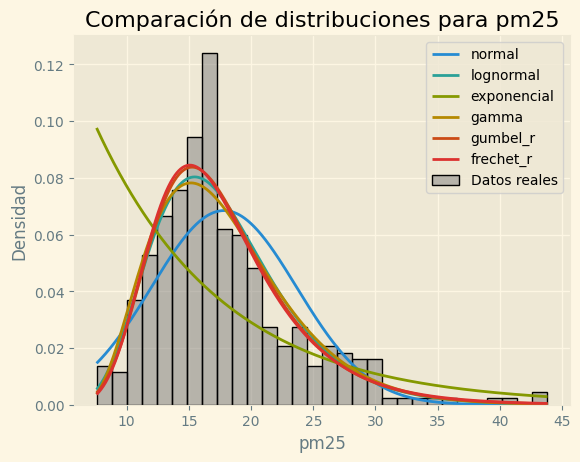

In [108]:
analizar_distribuciones(df_clean, 'pm25', nombre_visible='pm25')

In [98]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                logpm25   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     1.665
Date:                Wed, 25 Jun 2025   Prob (F-statistic):              0.230
Time:                        01:27:01   Log-Likelihood:                 3.7608
No. Observations:                  15   AIC:                            -1.522
Df Residuals:                      12   BIC:                            0.6026
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.9725      0.585      3.373      

In [100]:
from scipy.stats import shapiro


In [101]:
#residuales 
residuales = modelo.resid

# Test de normalidad en residuos
_, p_value = shapiro(residuales)
print(f"Normalidad de residuos (p > 0.05): {p_value > 0.05}")

Normalidad de residuos (p > 0.05): True


In [102]:
residuos = modelo.resid.values

In [103]:
from esda.moran import Moran

In [156]:
df_resultados = pd.DataFrame(resultados)
df_resultados

hora        r2  beta_temp   beta_pp    p_temp      p_pp
0      1  0.218629   0.065020 -0.003510  0.093881  0.972149
1      2  0.414017   0.077568  0.273522  0.034170  0.092251
2      3  0.355051   0.093021  0.252264  0.027097  0.224358
3      4  0.280162   0.085417  0.121088  0.051609  0.722143
4      5  0.341419   0.107672 -0.696257  0.028426  0.346560
5      6  0.309827   0.094992  0.183784  0.044230  0.781312
6      7  0.441181   0.136621  0.706078  0.010406  0.135479
7      8  0.480372   0.134895  2.848380  0.011242  0.121792
8      9  0.515417   0.106421  5.800769  0.012602  0.057229
9     10  0.659419   0.122455  5.168913  0.000910  0.008502
10    11  0.444408   0.078930  2.244439  0.025321  0.111528
11    12  0.326033   0.070213  0.604852  0.039721  0.290370
12    13  0.473735   0.064310 -1.265793  0.024103  0.026696
13    14  0.153801   0.038279  0.151824  0.226696  0.706919
14    15  0.358388   0.036833  0.249086  0.154836  0.043868
15    16  0.135303   0.026921  0.093213  0.351969  0.410363
16    17  0.132685   0.029925  0.086091  0.303856  0.367637
17    18  0.342186   0.040771 -0.597698  0.139727  0.047697
18    19  0.055286   0.021916  0.197174  0.530495  0.617733
19    20  0.036748   0.025535 -0.078391  0.537525  0.742453
20    21  0.083405   0.023780  0.327674  0.507772  0.442589
21    22  0.088570   0.034757  0.039410  0.306923  0.859201
22    23  0.303114   0.059823 -0.302774  0.068247  0.128094
23    24  0.217247   0.056929 -0.053764  0.109271  0.643614

**Se aplicó el modelo OLS a mis datos promediados por horas**
se puede observar los coeficientes de cada una de las variables dependientes y cuando son significativos, la linea gris solo dicen si los coeficientes son positivos o negativos, se puede ver que la temperatura crece en coeficiente de 6 a 11 de la mañana mientras que va disminuyendo después. 

para la precipitación se presenta mayores coeficientes a las 10 de la mañana, se presentas coeficientes altos y niveles de significancia buenos , además de representabilidad . Estos datos quieren decir que a mayor precipitación mayor material particulado, esto se puede deber a los picos de contaminación además de que se puede generar una estabilización temprana atmosférica lo cual puede generar que haya un atrapamiento de contaminantes.


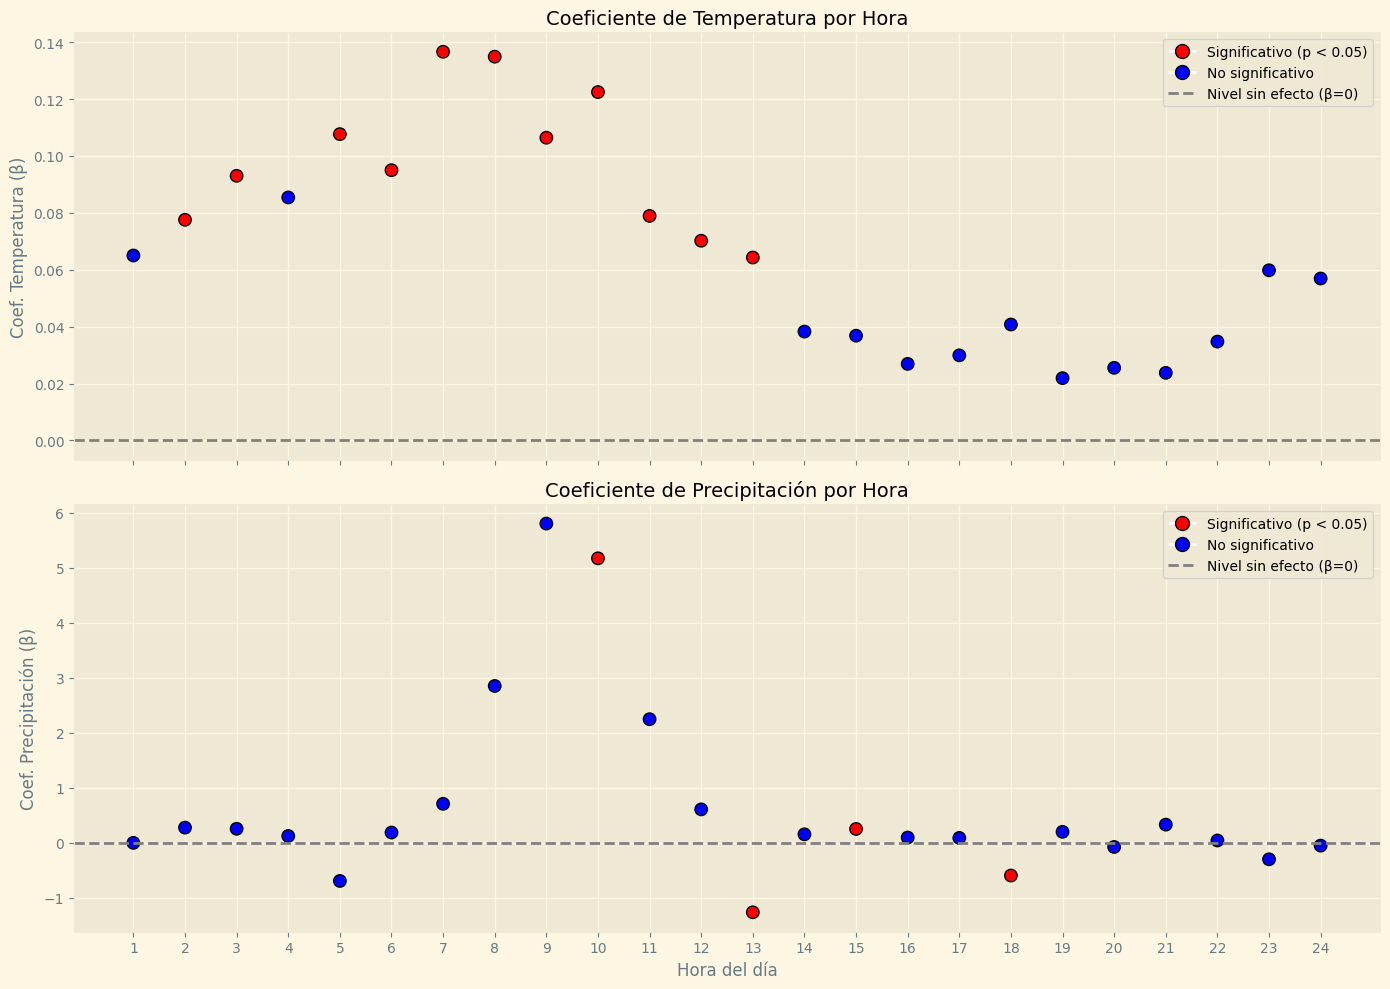

In [157]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)


horas = np.arange(1, 25)


df_resultados = df_resultados.set_index('hora').reindex(horas).reset_index()
colores_temp = ['red' if p < 0.05 else 'blue' for p in df_resultados['p_temp']]
colores_pp = ['red' if p < 0.05 else 'blue' for p in df_resultados['p_pp']]

# --- 1. Temperatura
ax[0].scatter(df_resultados['hora'], df_resultados['beta_temp'],
              c=colores_temp, s=80, edgecolor='k')
ax[0].axhline(0, color='gray', linestyle='--', label='Nivel sin efecto (β=0)')
ax[0].set_title('Coeficiente de Temperatura por Hora', fontsize=14)
ax[0].set_ylabel('Coef. Temperatura (β)', fontsize=12)
ax[0].grid(True)

# --- 2. Precipitación
ax[1].scatter(df_resultados['hora'], df_resultados['beta_pp'],
              c=colores_pp, s=80, edgecolor='k')
ax[1].axhline(0, color='gray', linestyle='--', label='Nivel sin efecto (β=0)')
ax[1].set_title('Coeficiente de Precipitación por Hora', fontsize=14)
ax[1].set_xlabel('Hora del día', fontsize=12)
ax[1].set_ylabel('Coef. Precipitación (β)', fontsize=12)
ax[1].grid(True)

# Eje X con todas las horas
ax[1].set_xticks(horas)


leyenda = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markeredgecolor='k', markersize=10, label='Significativo (p < 0.05)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markeredgecolor='k', markersize=10, label='No significativo'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Nivel sin efecto (β=0)')
]
ax[0].legend(handles=leyenda, loc='upper right')
ax[1].legend(handles=leyenda, loc='upper right')

plt.tight_layout()
plt.show()

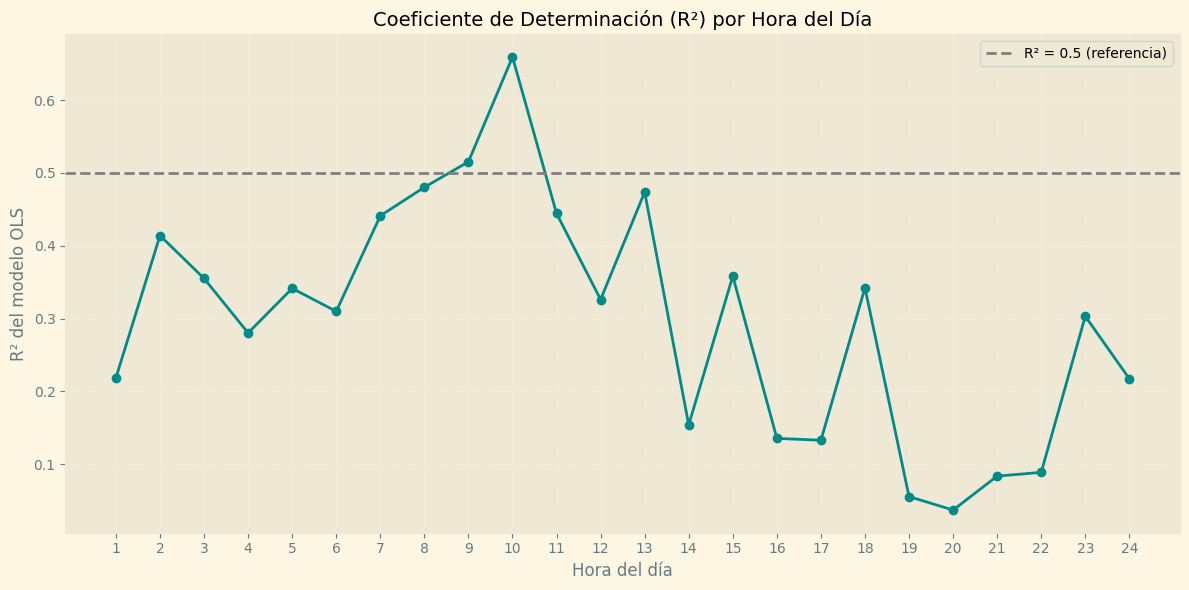

In [158]:
import matplotlib.pyplot as plt



plt.figure(figsize=(12, 6))

# Gráfico de R² por hora
plt.plot(df_resultados['hora'], df_resultados['r2'], marker='o', color='darkcyan', linewidth=2)
plt.axhline(0.5, color='gray', linestyle='--', label='R² = 0.5 (referencia)')

# Estética del gráfico
plt.title('Coeficiente de Determinación (R²) por Hora del Día', fontsize=14)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('R² del modelo OLS', fontsize=12)
plt.xticks(range(1, 25))
plt.grid(True, linestyle=':', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


Apliando modelos SAR y CAR  a mis datos obtengo 
1. aplica la matriz de vecinos
2. Se ajusta los modelos CAR y SAR
3. Análisis


In [182]:
#para modelo car y sar se uso ambiente espacial_pm25

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\SKop981040\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [62]:
esthorario= pd.merge(estaciones, df_clean, on="Codigo")
esthorario

Codigo                 Estacion  Longitud  Latitud    Ciudad   
0        12  Estación Tráfico Centro -75.56958  6.25256  Medellin  \
1        12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
2        12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
3        12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
4        12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
..      ...                      ...       ...      ...       ...   
355      94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
356      94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
357      94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
358      94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
359      94   Medellín - Santa Elena -75.49847  6.23636  Medellín   

                      geometry  hora       pm25  pp_horaria  temperatura   
0    POINT (-75.56958 6.25256)     1  28.026581    0.294968    19.163871  \
1    POINT (-75.56958 6.25256)     2  27.870992    0.540774    18.928801   
2    POINT (-75.56958 6.25256)     3  27.077382    1.122516    18.679000   
3    POINT (-75.56958 6.25256)     4  26.379148    0.409677    18.487376   
4    POINT (-75.56958 6.25256)     5  26.380198    0.270387    18.398113   
..                         ...   ...        ...         ...          ...   
355  POINT (-75.49847 6.23636)    20  11.010333    0.098323    12.894070   
356  POINT (-75.49847 6.23636)    21  12.649717    0.409677    12.673548   
357  POINT (-75.49847 6.23636)    22  12.676909    0.122903    12.506495   
358  POINT (-75.49847 6.23636)    23  11.904949    0.155677    12.283457   
359  POINT (-75.49847 6.23636)    24  10.743358    0.876710    12.044747   

      logpm25  
0    3.368212  
1    3.362837  
2    3.334964  
3    3.309782  
4    3.309820  
..        ...  
355  2.485767  
356  2.613719  
357  2.615709  
358  2.557611  
359  2.463288  

[360 rows x 11 columns]

In [63]:
esthorario= gpd.GeoDataFrame(esthorario, geometry=gpd.points_from_xy(esthorario['Longitud'], esthorario['Latitud']))
esthorario= esthorario.set_crs("EPSG:4326") 

In [64]:
esthorario

Codigo                 Estacion  Longitud  Latitud    Ciudad   
0        12  Estación Tráfico Centro -75.56958  6.25256  Medellin  \
1        12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
2        12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
3        12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
4        12  Estación Tráfico Centro -75.56958  6.25256  Medellin   
..      ...                      ...       ...      ...       ...   
355      94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
356      94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
357      94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
358      94   Medellín - Santa Elena -75.49847  6.23636  Medellín   
359      94   Medellín - Santa Elena -75.49847  6.23636  Medellín   

                      geometry  hora       pm25  pp_horaria  temperatura   
0    POINT (-75.56958 6.25256)     1  28.026581    0.294968    19.163871  \
1    POINT (-75.56958 6.25256)     2  27.870992    0.540774    18.928801   
2    POINT (-75.56958 6.25256)     3  27.077382    1.122516    18.679000   
3    POINT (-75.56958 6.25256)     4  26.379148    0.409677    18.487376   
4    POINT (-75.56958 6.25256)     5  26.380198    0.270387    18.398113   
..                         ...   ...        ...         ...          ...   
355  POINT (-75.49847 6.23636)    20  11.010333    0.098323    12.894070   
356  POINT (-75.49847 6.23636)    21  12.649717    0.409677    12.673548   
357  POINT (-75.49847 6.23636)    22  12.676909    0.122903    12.506495   
358  POINT (-75.49847 6.23636)    23  11.904949    0.155677    12.283457   
359  POINT (-75.49847 6.23636)    24  10.743358    0.876710    12.044747   

      logpm25  
0    3.368212  
1    3.362837  
2    3.334964  
3    3.309782  
4    3.309820  
..        ...  
355  2.485767  
356  2.613719  
357  2.615709  
358  2.557611  
359  2.463288  

[360 rows x 11 columns]

In [65]:
#matriz
from libpysal.weights import KNN
w_knn=KNN.from_dataframe(esthorario, k=3)
w_knn.transform = 'r'

In [85]:
pip install esda

  Using cached esda-2.7.0-py3-none-any.whl.metadata (2.0 kB)
Using cached esda-2.7.0-py3-none-any.whl (142 kB)
Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install statsmodels

  Using cached statsmodels-0.14.4-cp310-cp310-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp310-cp310-win_amd64.whl (9.8 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)

   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [st

In [66]:
import pandas as pd
import numpy as np
from libpysal.weights import KNN
from esda.moran import Moran
import statsmodels.api as sm

resultados_moran_residuos = []

for h in range(1, 25):
    df_h = esthorario[esthorario['hora'] == h]
    
    if len(df_h) < 10:
        continue
    
    y = df_h['logpm25'].values
    X = sm.add_constant(df_h[['temperatura', 'pp_horaria']])
    
    modelo = sm.OLS(y, X).fit()
    residuos = modelo.resid

    coords = df_h[['Longitud', 'Latitud']].values
    w = KNN.from_array(coords, k=3)
    w.transform = 'r'
    
    moran_res = Moran(residuos, w, permutations=999)

    resultados_moran_residuos.append({
        'hora': h,
        'r2': modelo.rsquared,
        'I_resid': moran_res.I,
        'p_resid': moran_res.p_sim
    })

df_moran_res = pd.DataFrame(resultados_moran_residuos)
print(df_moran_res)


    hora        r2   I_resid  p_resid
0      1  0.218629  0.274442    0.027
1      2  0.414017  0.292928    0.032
2      3  0.355051  0.053595    0.195
3      4  0.280162  0.206743    0.063
4      5  0.341419  0.275323    0.018
5      6  0.309827  0.252934    0.039
6      7  0.441181  0.277346    0.033
7      8  0.480372  0.119929    0.123
8      9  0.515417  0.157029    0.091
9     10  0.659419  0.139539    0.123
10    11  0.444408  0.120139    0.128
11    12  0.326033  0.220228    0.059
12    13  0.473735 -0.033769    0.396
13    14  0.153801  0.154260    0.094
14    15  0.358388  0.399851    0.005
15    16  0.135303  0.183174    0.042
16    17  0.132685 -0.064701    0.466
17    18  0.342186  0.057457    0.198
18    19  0.055286  0.161887    0.067
19    20  0.036748  0.187564    0.058
20    21  0.083405  0.288813    0.038
21    22  0.088570  0.278084    0.017
22    23  0.303114  0.088228    0.142
23    24  0.217247  0.269373    0.029


In [69]:
df_h

Codigo                                           Estacion  Longitud   
23       12                            Estación Tráfico Centro -75.56958  \
47       38          Itagüí - I.E. Concejo Municipal de Itagüí -75.64436   
71       69                   Caldas - E U Joaquín Aristizabal -75.63776   
95       78                             La Estrella - Hospital -75.64417   
119      79     Medellín, Altavista - I.E. Pedro Octavio Amado -75.61060   
143      80  Medellín, Villahermosa - Planta de producción ... -75.54826   
167      81                             Barbosa - Torre Social -75.33040   
191      82           Copacabana - Ciudadela Educativa La Vida -75.50475   
215      83           Medellin, Belén - I.E Pedro Justo Berrio -75.61047   
239      84  Medellín, El Poblado - I.E INEM sede Santa Cat... -75.56095   
263      85  Medellín, San Cristobal - Parque Biblioteca Fe... -75.63643   
287      87                        Bello - I.E. Fernando Vélez -75.56780   
311      88                  Envigado - E.S.E. Santa Gertrudis -75.58197   
335      90                    Sabaneta - I.E. Rafael J. Mejía -75.62126   
359      94                             Medellín - Santa Elena -75.49847   

     Latitud       Ciudad                   geometry  hora       pm25   
23   6.25256     Medellin  POINT (-75.56958 6.25256)    24  28.714774  \
47   6.16850       Itagüí   POINT (-75.64436 6.1685)    24  20.306508   
71   6.09308       Caldas  POINT (-75.63776 6.09308)    24  19.649826   
95   6.15553  La Estrella  POINT (-75.64417 6.15553)    24  16.909476   
119  6.22189     Medellin   POINT (-75.6106 6.22189)    24  21.164051   
143  6.25891     Medellin  POINT (-75.54826 6.25891)    24  19.361909   
167  6.43696      Barbosa   POINT (-75.3304 6.43696)    24  12.905917   
191  6.34536   Copacabana  POINT (-75.50475 6.34536)    24  15.283166   
215  6.23723     Medellin  POINT (-75.61047 6.23723)    24  22.398717   
239  6.19987     Medellin  POINT (-75.56095 6.19987)    24  17.428519   
263  6.27785     Medellin  POINT (-75.63643 6.27785)    24  16.433785   
287  6.33755        Bello   POINT (-75.5678 6.33755)    24  16.314599   
311  6.16868     Envigado  POINT (-75.58197 6.16868)    24  15.704065   
335  6.14550     Sabaneta   POINT (-75.62126 6.1455)    24  16.615613   
359  6.23636     Medellín  POINT (-75.49847 6.23636)    24  10.743358   

     pp_horaria  temperatura   logpm25  
23     0.532581    19.543022  3.391644  
47     1.016000    17.220554  3.059013  
71     0.914400    16.494355  3.027707  
95     1.663290    17.311995  2.885330  
119    0.180258    16.970317  3.098472  
143    0.876710    17.152656  3.013666  
167    0.401484    18.825323  2.632314  
191    0.528065    18.787258  2.790132  
215    0.180258    16.970317  3.152681  
239    0.811161    17.621124  2.913899  
263    0.122903    16.970317  2.858410  
287    0.172065    17.695898  2.851550  
311    1.025407    18.776038  2.815652  
335    1.663290    18.010978  2.868786  
359    0.876710    12.044747  2.463288

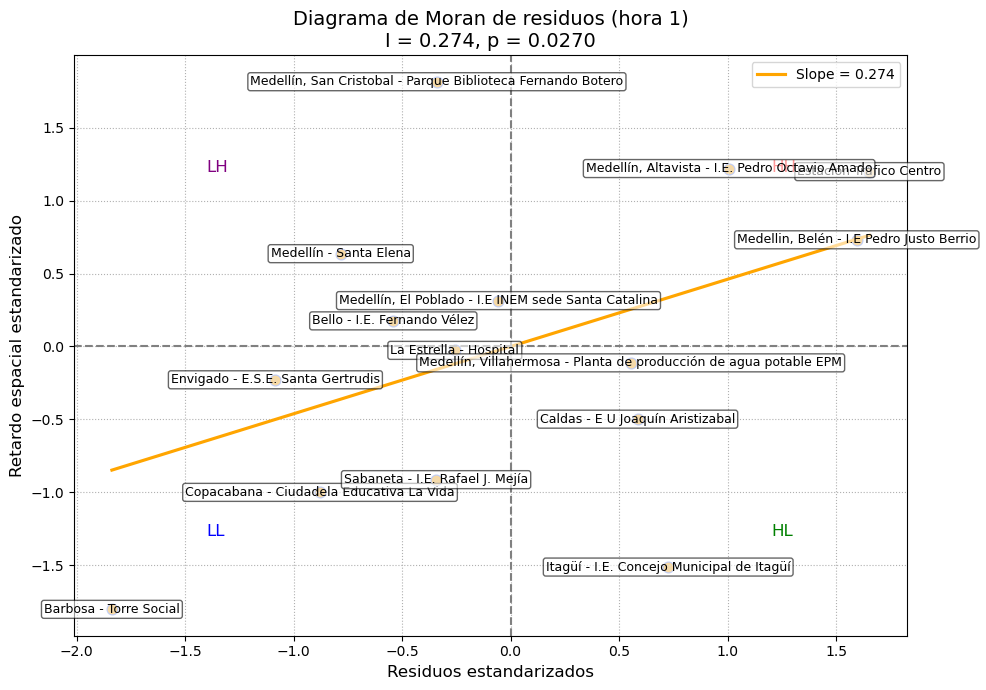

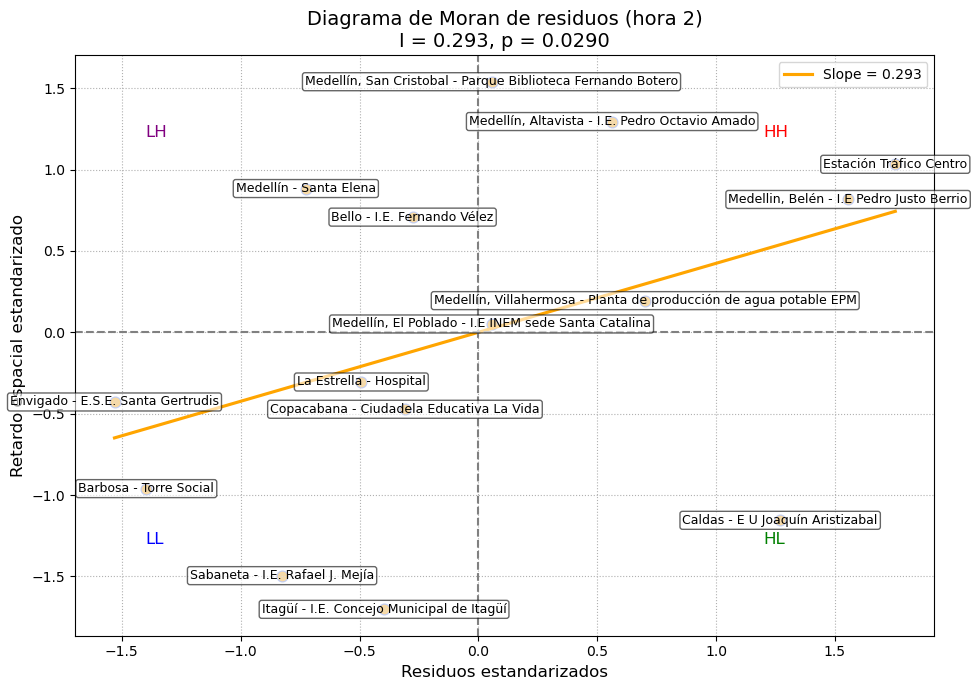

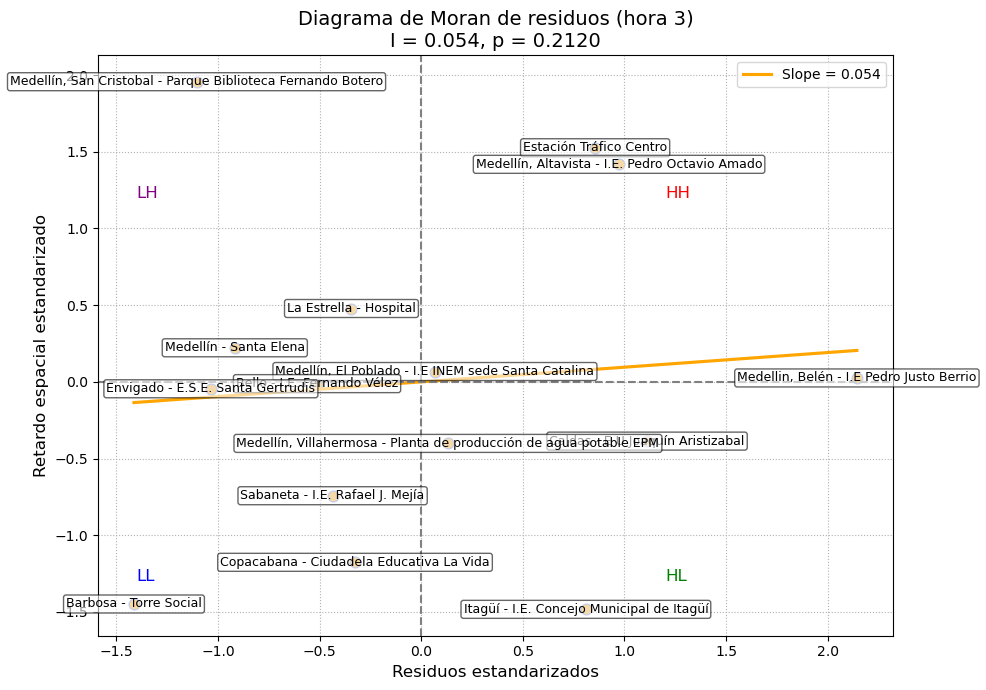

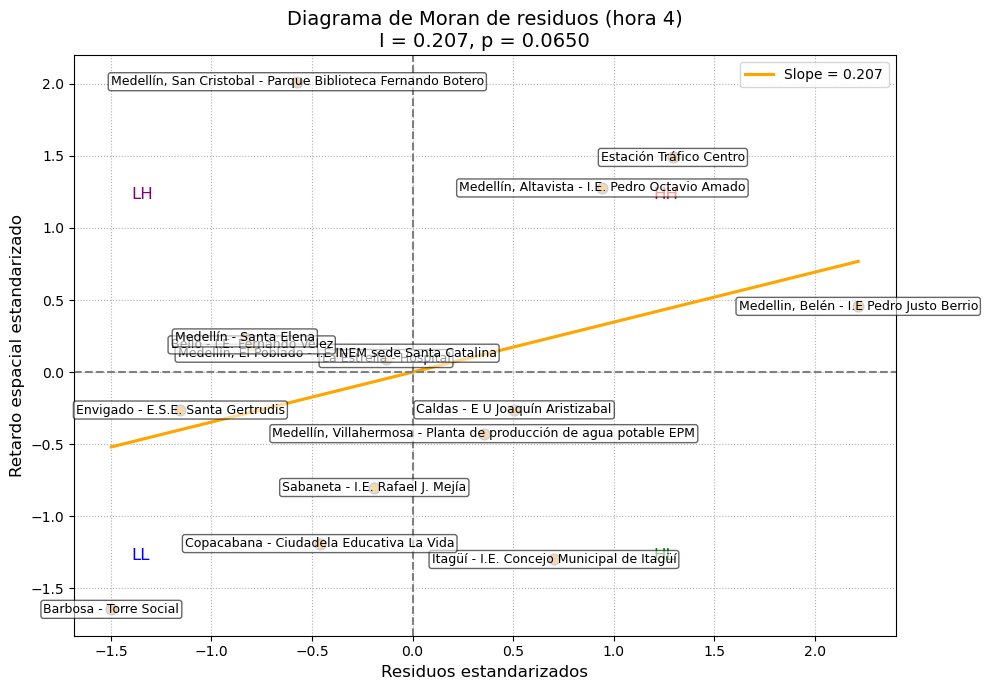

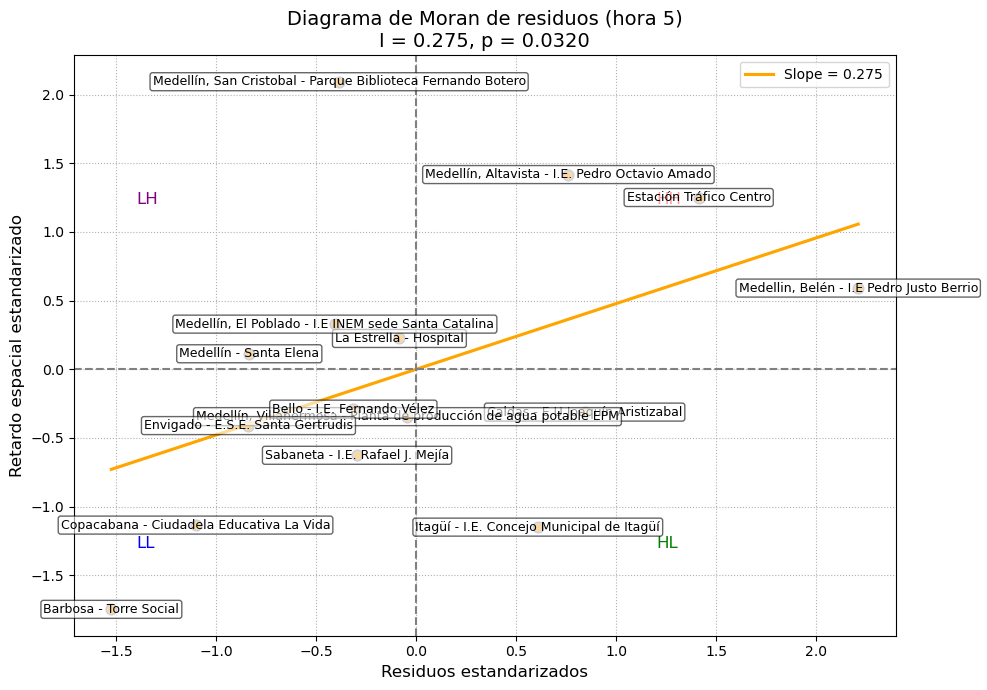

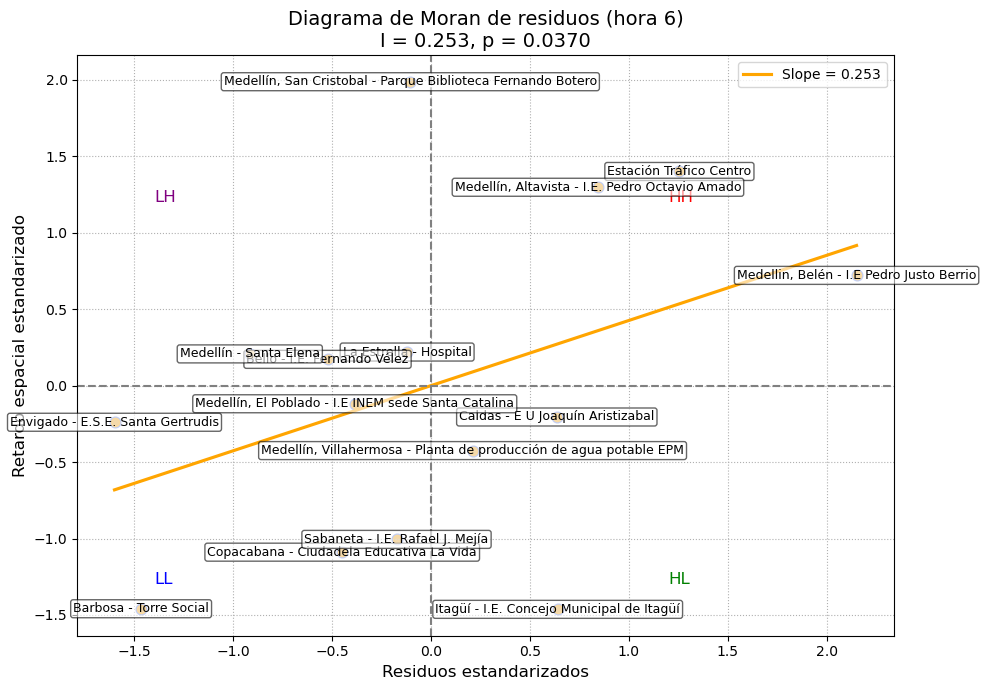

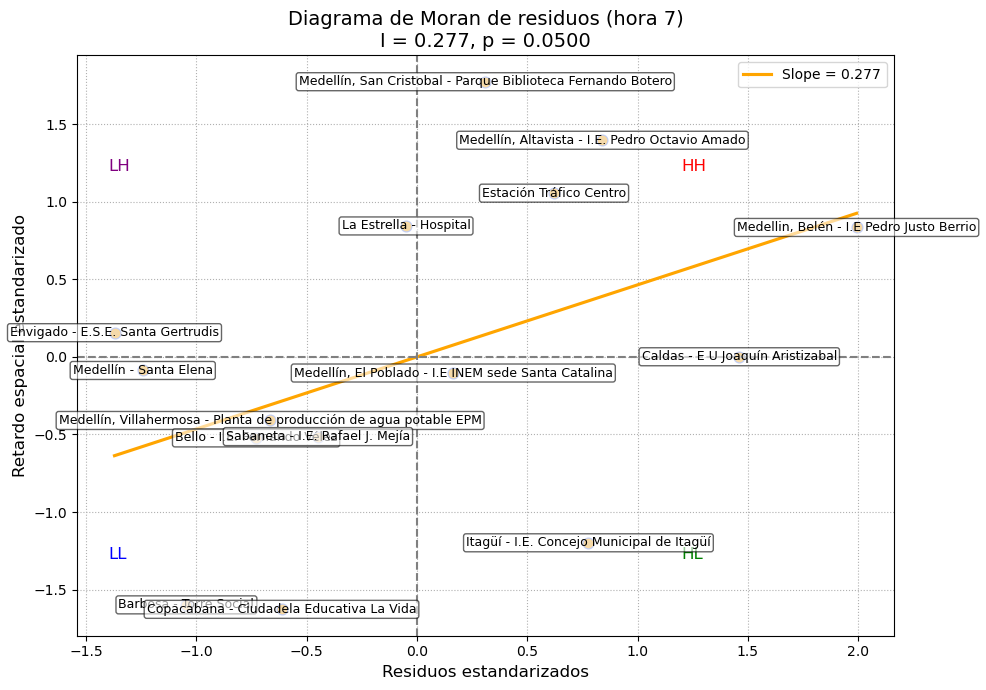

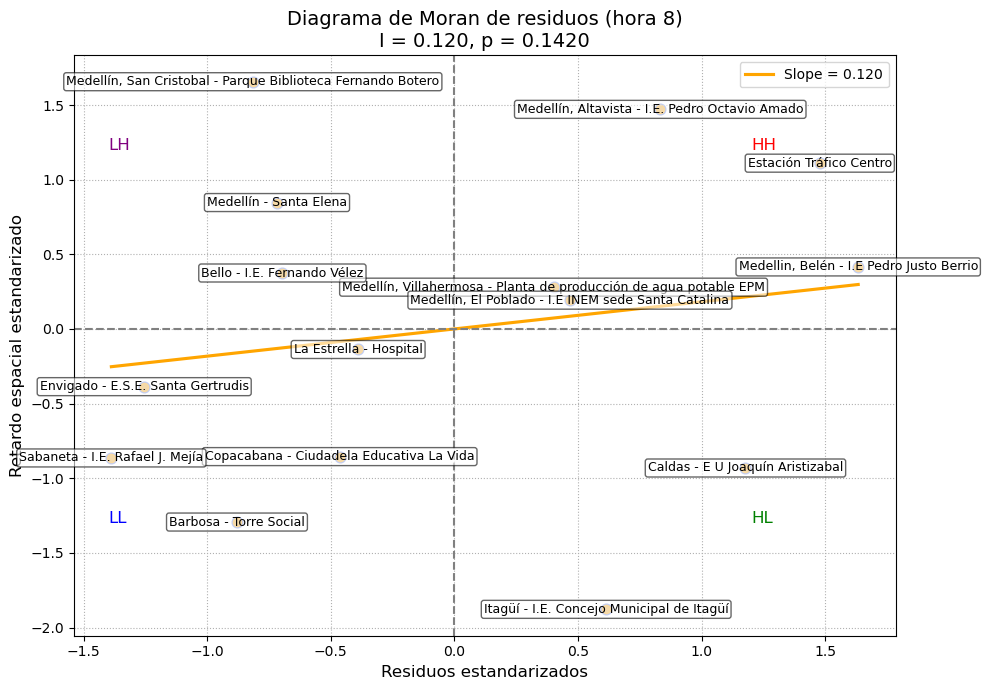

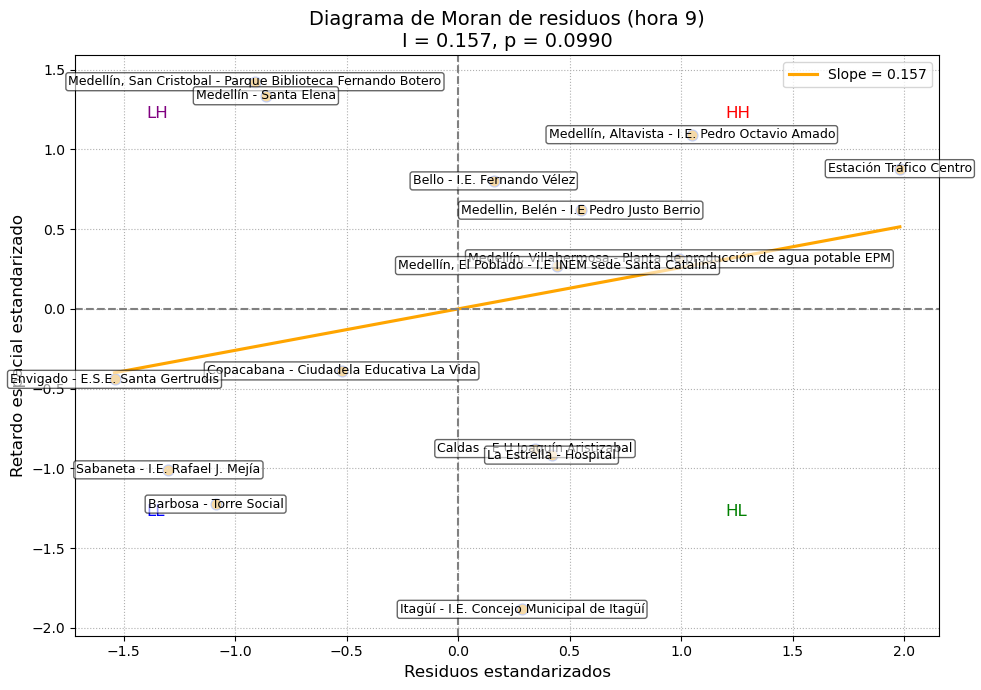

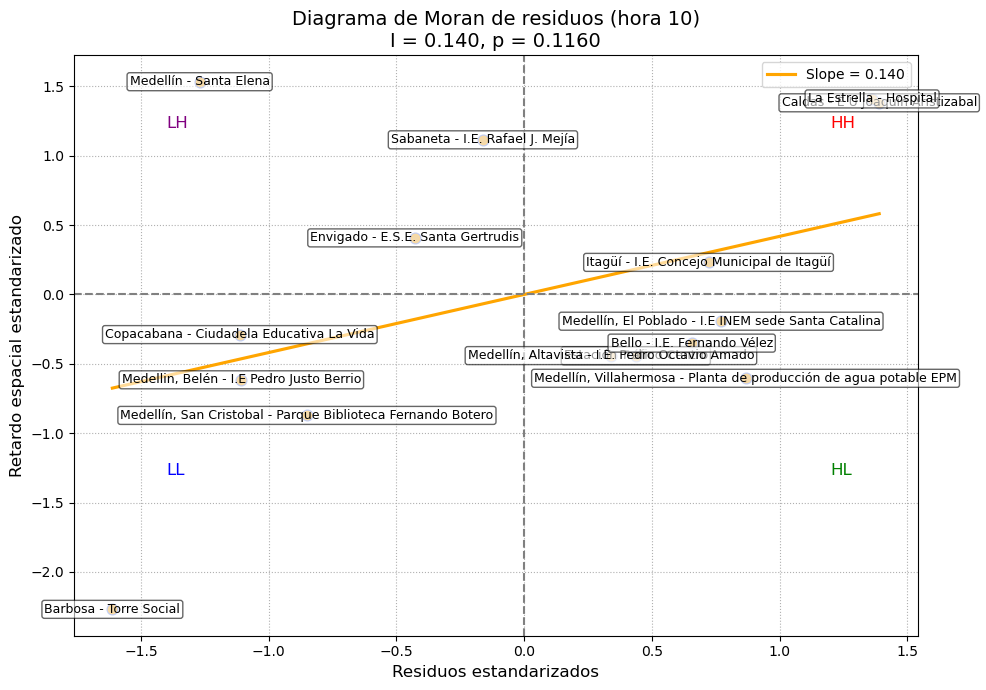

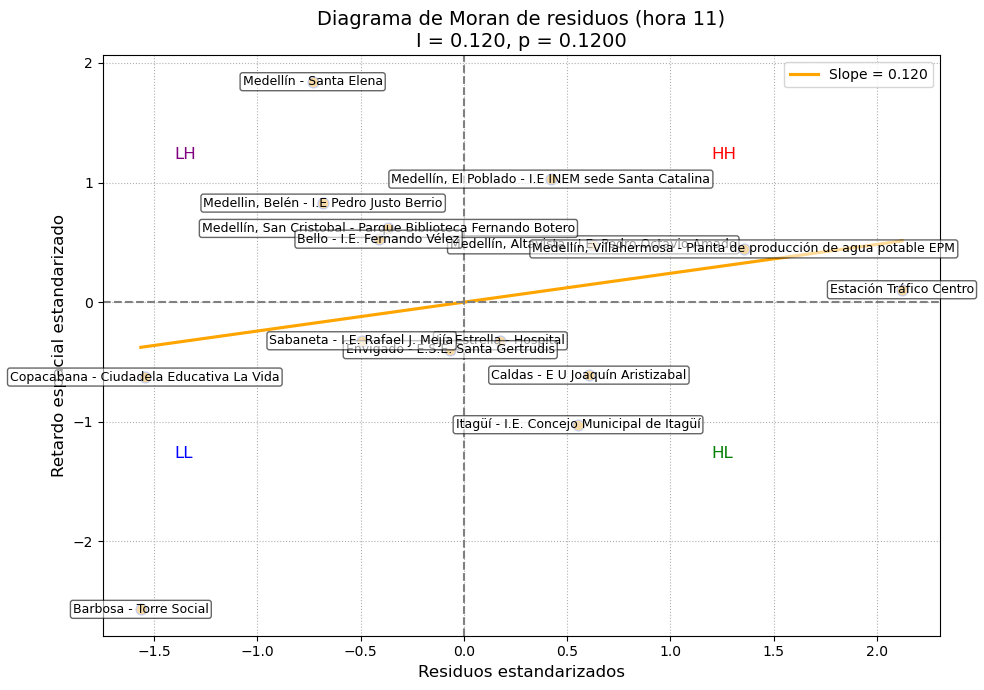

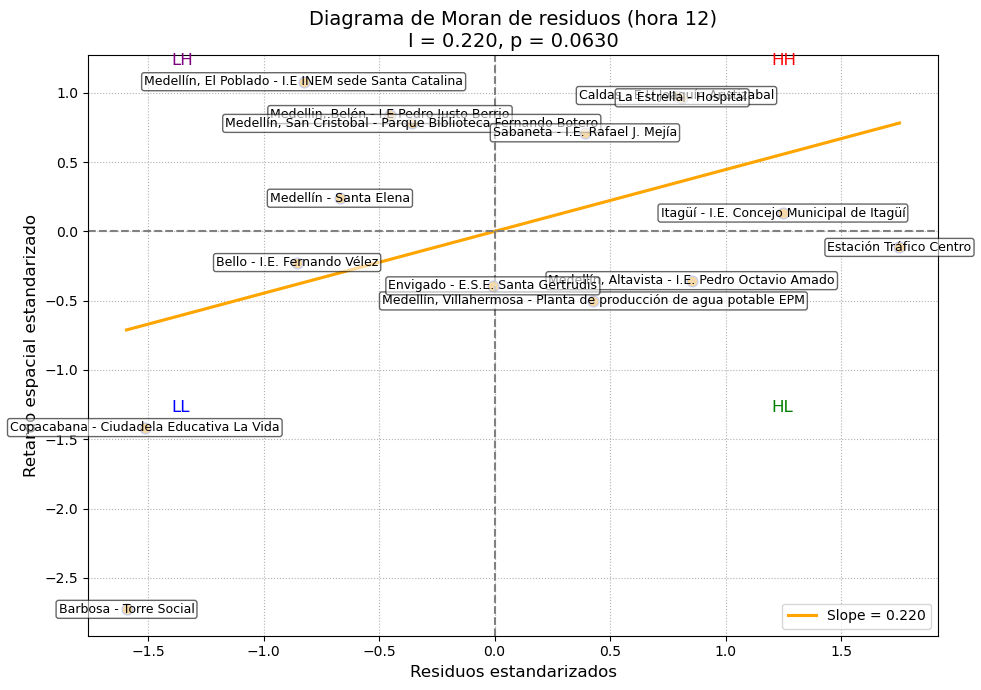

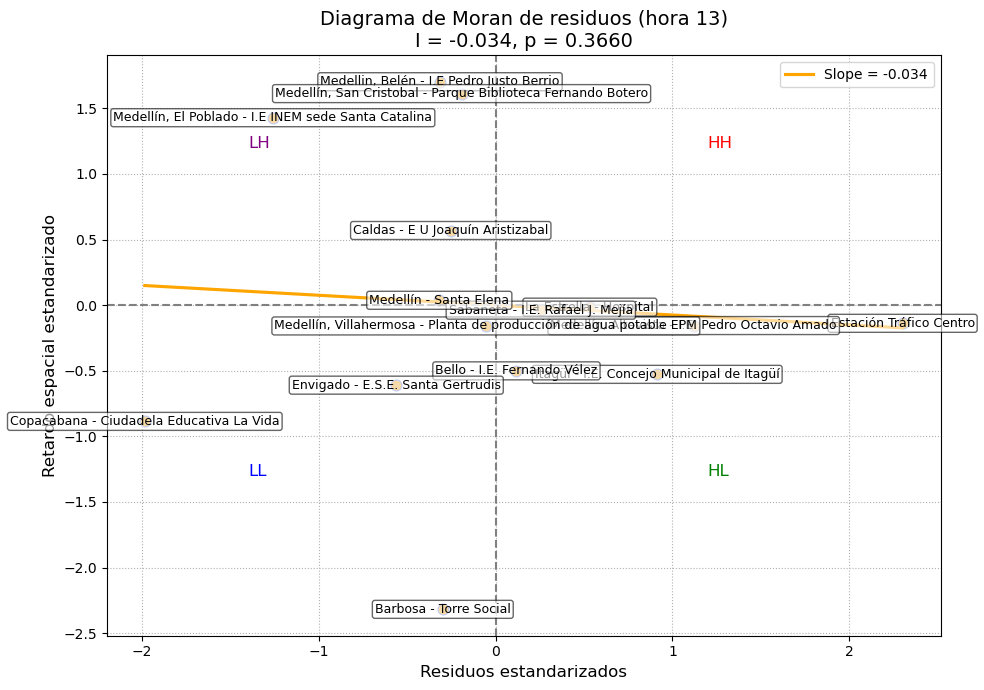

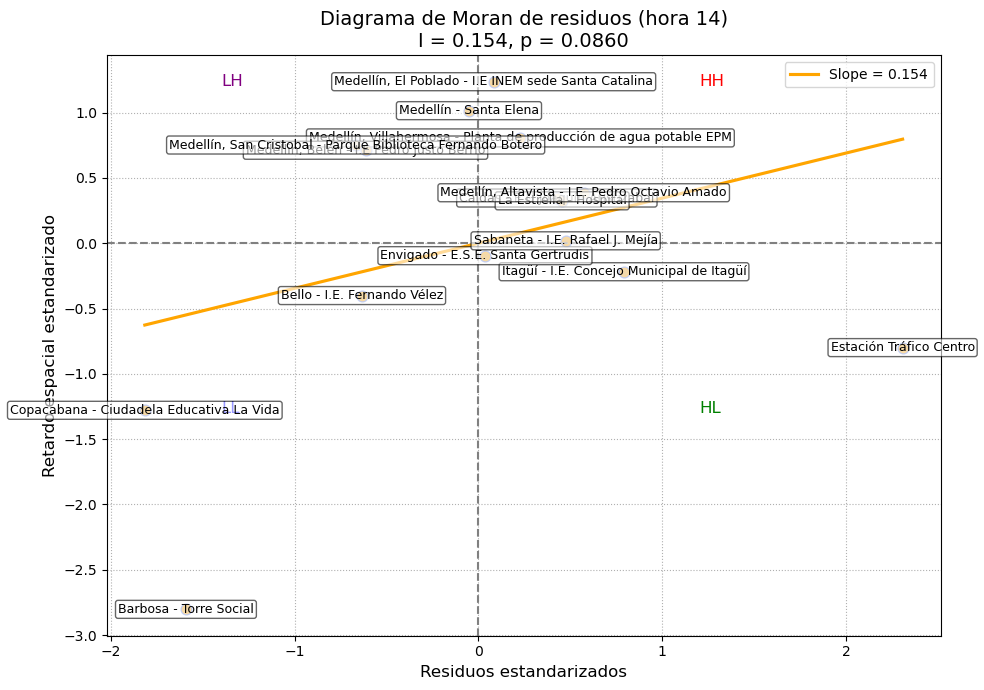

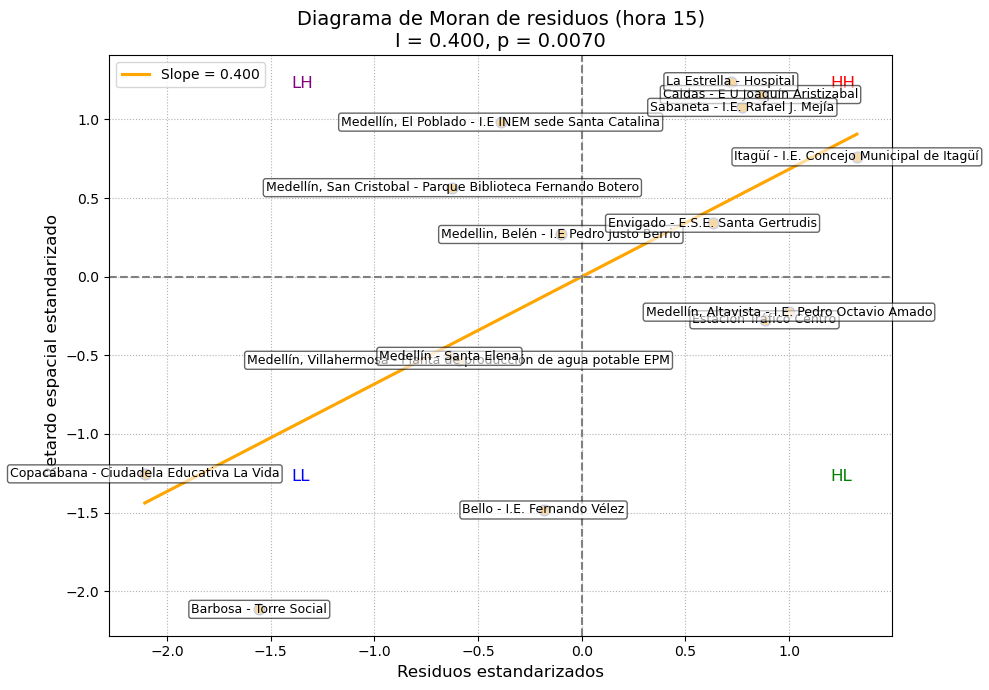

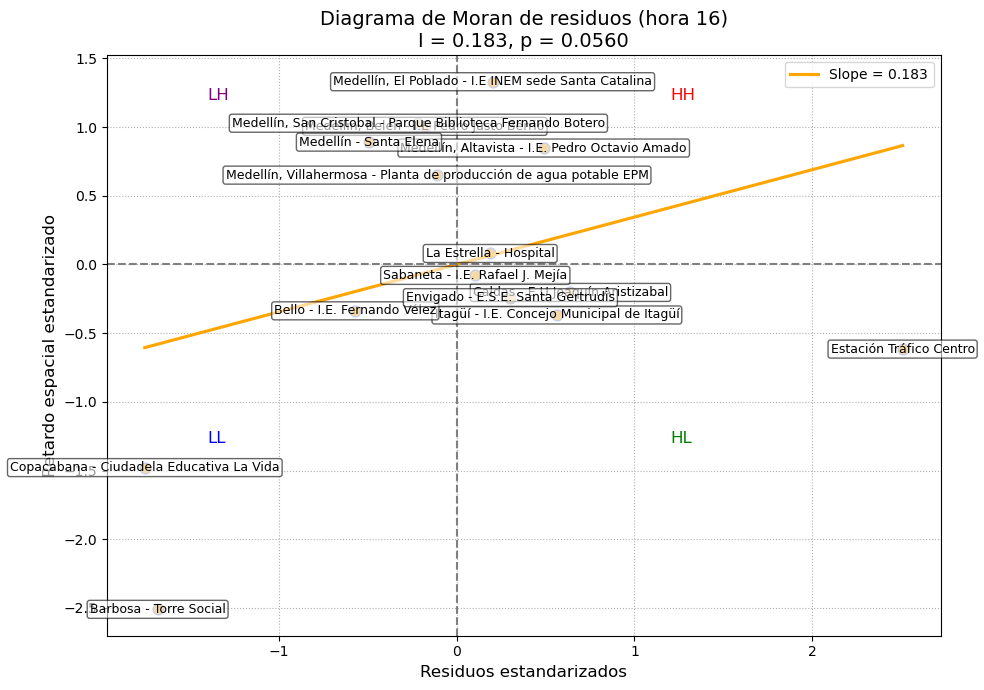

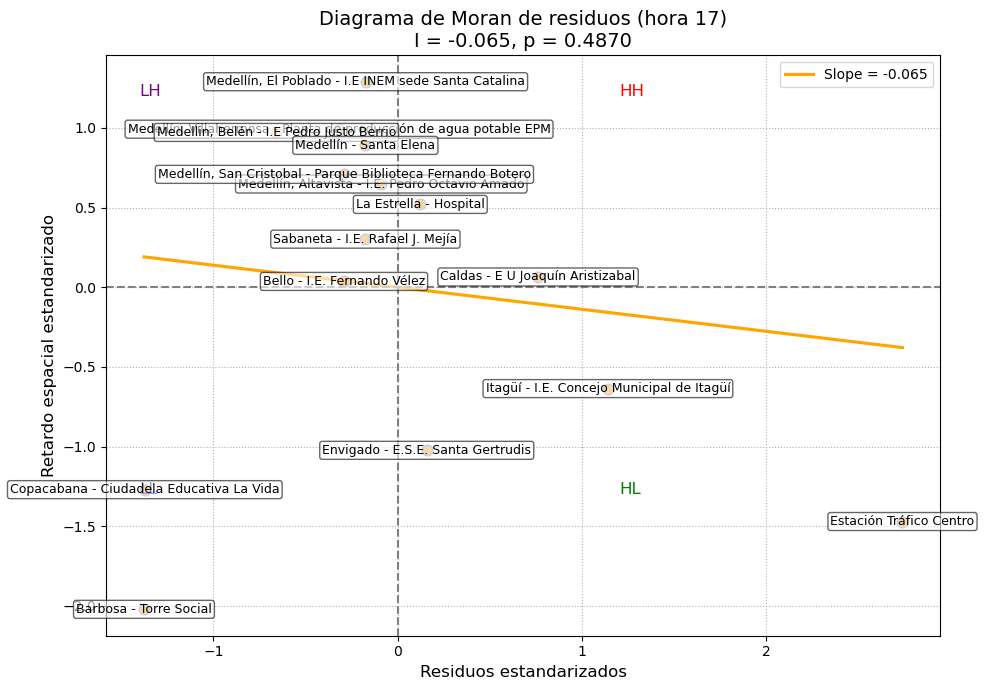

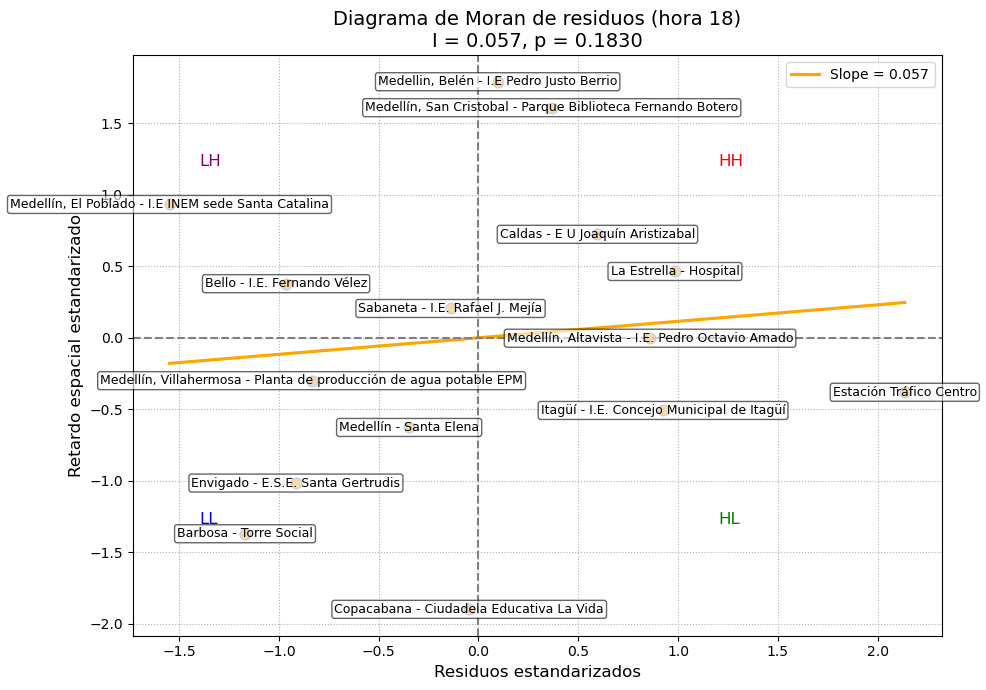

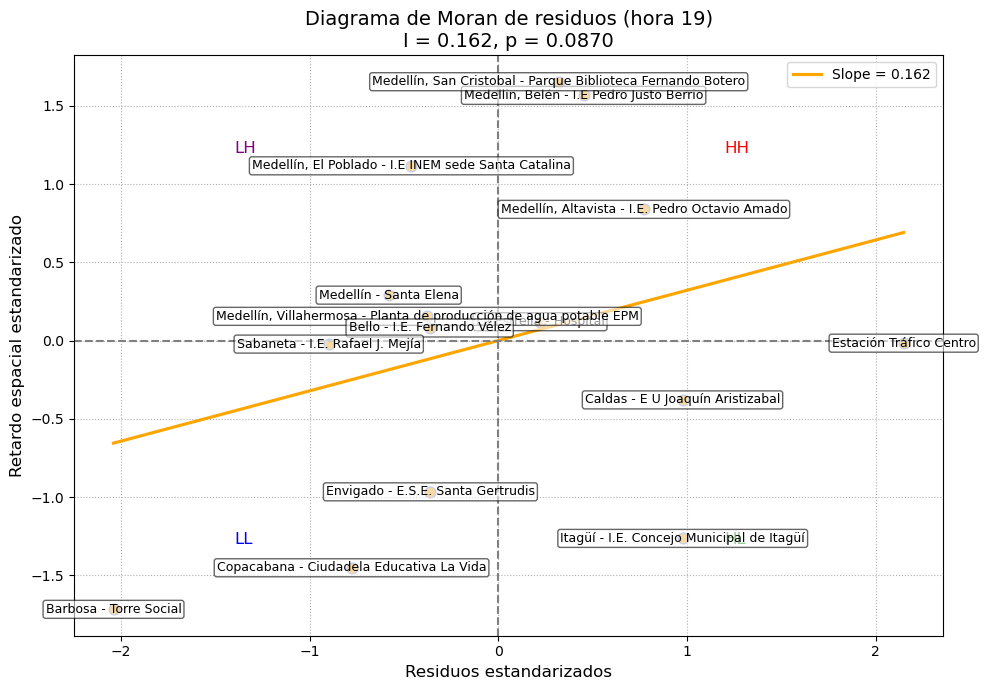

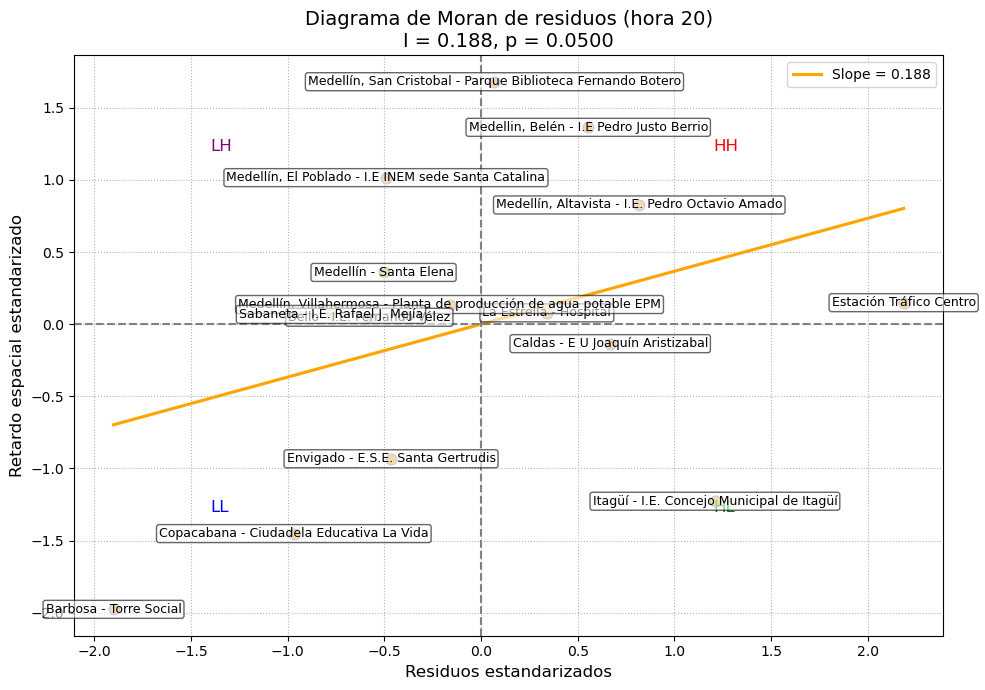

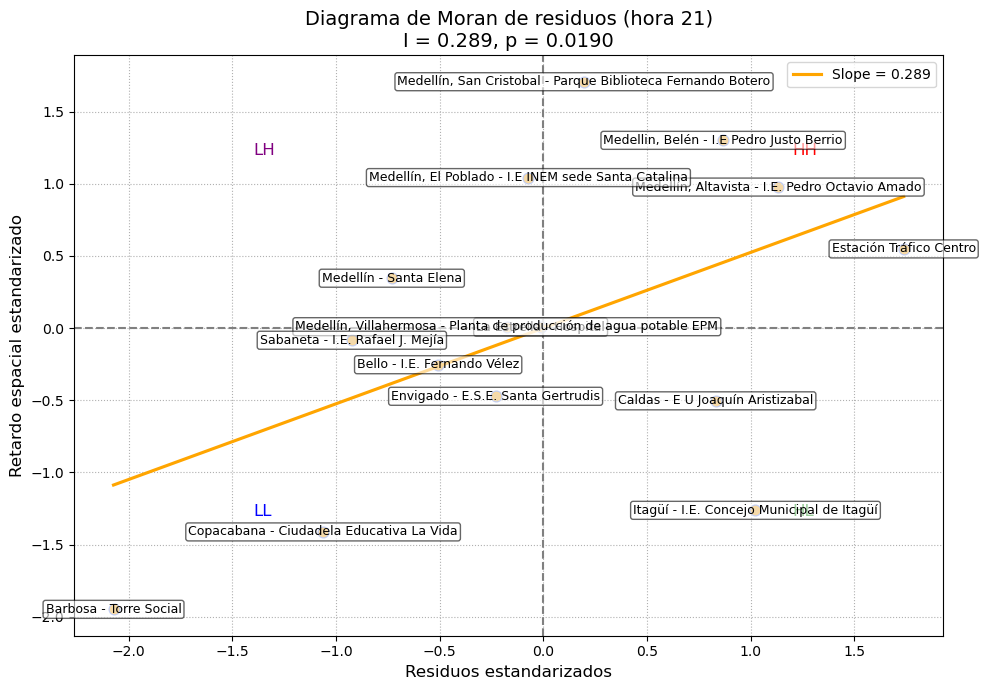

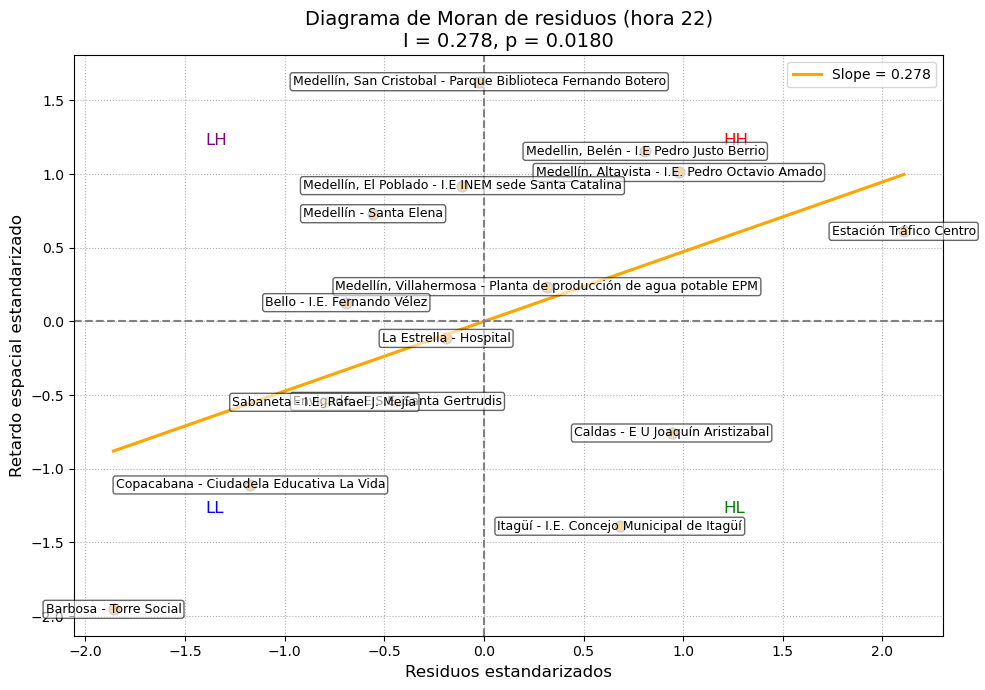

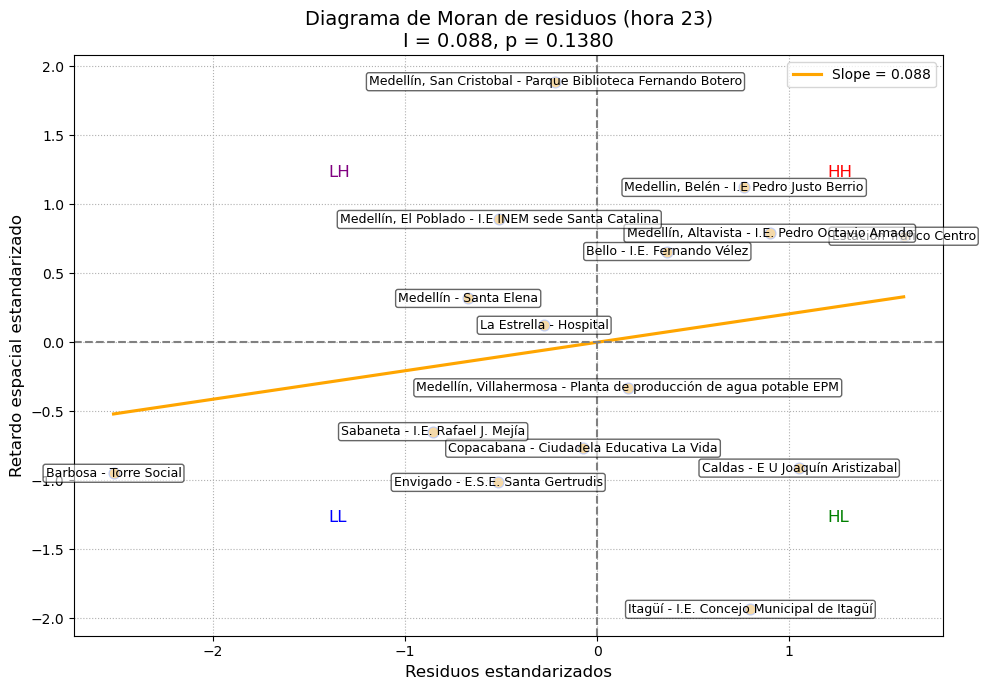

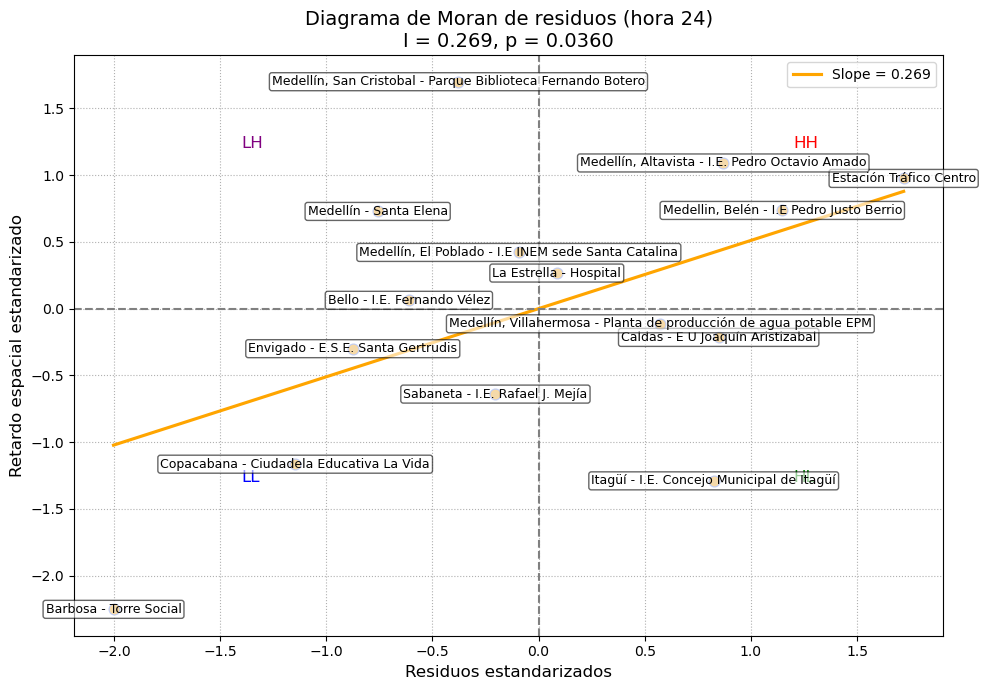

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from esda.moran import Moran
from libpysal.weights import KNN
import statsmodels.api as sm
import numpy as np

# Bucle por hora
for hora in range(1, 25):
    df_h = esthorario[esthorario['hora'] == hora]
    
    if len(df_h) < 10:
        print(f"Saltando hora {hora}: no hay suficientes datos.")
        continue
    
    # Modelo lineal
    y = df_h['logpm25'].values
    X = sm.add_constant(df_h[['temperatura', 'pp_horaria']])
    modelo = sm.OLS(y, X).fit()
    residuos = modelo.resid

    # Coordenadas y pesos espaciales
    coords = df_h[['Longitud', 'Latitud']].values
    w = KNN.from_array(coords, k=3)
    w.transform = 'r'

    # Moran para residuos
    moran_res = Moran(residuos, w, permutations=999)

    # Estandarización
    y_std = (residuos - residuos.mean()) / residuos.std()
    spatial_lag = w.sparse @ residuos
    spatial_lag_std = (spatial_lag - spatial_lag.mean()) / spatial_lag.std()

    # Gráfico
    plt.figure(figsize=(10, 7))
    plt.scatter(y_std, spatial_lag_std, s=60, alpha=0.7, color='royalblue')

    # Línea de regresión
    sns.regplot(x=y_std, y=spatial_lag_std, ci=None, color='orange',
                line_kws={'label': f'Slope = {moran_res.I:.3f}'})

    # Cuadrantes
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    plt.text(1.2, 1.2, 'HH', fontsize=12, color='red')
    plt.text(-1.4, -1.3, 'LL', fontsize=12, color='blue')
    plt.text(1.2, -1.3, 'HL', fontsize=12, color='green')
    plt.text(-1.4, 1.2, 'LH', fontsize=12, color='purple')

    # Etiquetas (opcional)
    for i, (x, y_) in enumerate(zip(y_std, spatial_lag_std)):
        plt.text(x, y_, df_h['Estacion'].iloc[i], fontsize=9,
                 ha='center', va='center',
                 bbox=dict(facecolor='white', alpha=0.6, boxstyle='round,pad=0.2'))

    # Título y ejes
    plt.title(f"Diagrama de Moran de residuos (hora {hora})\nI = {moran_res.I:.3f}, p = {moran_res.p_sim:.4f}", fontsize=14)
    plt.xlabel("Residuos estandarizados", fontsize=12)
    plt.ylabel("Retardo espacial estandarizado", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle=':')
    plt.tight_layout()
    plt.show()



Nos damos cuenta que aplicando moran podemos ver que a varias horas del día hay espacialidad en los residuos por lo cual se realizó el modelo CAR Y SAR , en este caso utilizamos el CAR(ML error) ya que los residuos mostraron dependencia espacial significativa y usamos SAR lag para mirar si esto puede afectar a otras vecinas 

**se utilizaron modelos SAR Y CAR**
SAR de máxima verosimilitud donde rh mide la dependencia espacial de variables dependientes sobre otras , o sea mis estaciones sobre otras 
CAR modelo de error espacial , lambda captura la correlación espacial en los errores

In [72]:
df_h

Codigo                                           Estacion  Longitud   
23       12                            Estación Tráfico Centro -75.56958  \
47       38          Itagüí - I.E. Concejo Municipal de Itagüí -75.64436   
71       69                   Caldas - E U Joaquín Aristizabal -75.63776   
95       78                             La Estrella - Hospital -75.64417   
119      79     Medellín, Altavista - I.E. Pedro Octavio Amado -75.61060   
143      80  Medellín, Villahermosa - Planta de producción ... -75.54826   
167      81                             Barbosa - Torre Social -75.33040   
191      82           Copacabana - Ciudadela Educativa La Vida -75.50475   
215      83           Medellin, Belén - I.E Pedro Justo Berrio -75.61047   
239      84  Medellín, El Poblado - I.E INEM sede Santa Cat... -75.56095   
263      85  Medellín, San Cristobal - Parque Biblioteca Fe... -75.63643   
287      87                        Bello - I.E. Fernando Vélez -75.56780   
311      88                  Envigado - E.S.E. Santa Gertrudis -75.58197   
335      90                    Sabaneta - I.E. Rafael J. Mejía -75.62126   
359      94                             Medellín - Santa Elena -75.49847   

     Latitud       Ciudad                   geometry  hora       pm25   
23   6.25256     Medellin  POINT (-75.56958 6.25256)    24  28.714774  \
47   6.16850       Itagüí   POINT (-75.64436 6.1685)    24  20.306508   
71   6.09308       Caldas  POINT (-75.63776 6.09308)    24  19.649826   
95   6.15553  La Estrella  POINT (-75.64417 6.15553)    24  16.909476   
119  6.22189     Medellin   POINT (-75.6106 6.22189)    24  21.164051   
143  6.25891     Medellin  POINT (-75.54826 6.25891)    24  19.361909   
167  6.43696      Barbosa   POINT (-75.3304 6.43696)    24  12.905917   
191  6.34536   Copacabana  POINT (-75.50475 6.34536)    24  15.283166   
215  6.23723     Medellin  POINT (-75.61047 6.23723)    24  22.398717   
239  6.19987     Medellin  POINT (-75.56095 6.19987)    24  17.428519   
263  6.27785     Medellin  POINT (-75.63643 6.27785)    24  16.433785   
287  6.33755        Bello   POINT (-75.5678 6.33755)    24  16.314599   
311  6.16868     Envigado  POINT (-75.58197 6.16868)    24  15.704065   
335  6.14550     Sabaneta   POINT (-75.62126 6.1455)    24  16.615613   
359  6.23636     Medellín  POINT (-75.49847 6.23636)    24  10.743358   

     pp_horaria  temperatura   logpm25  
23     0.532581    19.543022  3.391644  
47     1.016000    17.220554  3.059013  
71     0.914400    16.494355  3.027707  
95     1.663290    17.311995  2.885330  
119    0.180258    16.970317  3.098472  
143    0.876710    17.152656  3.013666  
167    0.401484    18.825323  2.632314  
191    0.528065    18.787258  2.790132  
215    0.180258    16.970317  3.152681  
239    0.811161    17.621124  2.913899  
263    0.122903    16.970317  2.858410  
287    0.172065    17.695898  2.851550  
311    1.025407    18.776038  2.815652  
335    1.663290    18.010978  2.868786  
359    0.876710    12.044747  2.463288

In [113]:
#ultimo utilizado 
from libpysal.weights import KNN, DistanceBand
from spreg import ML_Error
import numpy as np
import pandas as pd
import geopandas as gpd

use_log = True  # aplicar logaritmo a pm25

# Inicializar DataFrame para guardar resultados
df_car = pd.DataFrame(columns=[
    'hora',
    'beta_temp_car', 'p_temp_car',
    'beta_pp_car', 'p_pp_car',
    'beta_temp2_car', 'p_temp2_car',
    'rho_car', 'p_rho_car'
])

for h in range(1, 25):
    print(f"\n========== HORA {h} ==========")
    df_h = esthorario[esthorario['hora'] == h].copy()
    
    if len(df_h) < 10:
        print(f"--- Hora {h} OMITIDA (menos de 10 observaciones) ---")
        continue

    df_h = df_h.dropna(subset=['pm25', 'temperatura', 'pp_horaria', 'Longitud', 'Latitud'])
    if len(df_h) < 3:
        print(f"--- Hora {h} OMITIDA (menos de 3 observaciones válidas) ---")
        continue

    # Crear GeoDataFrame
    gdf_h = gpd.GeoDataFrame(
        df_h,
        geometry=gpd.points_from_xy(df_h['Longitud'], df_h['Latitud']),
        crs="EPSG:4326"
    )

    # Crear matriz de pesos espaciales
    try:
        w_h = KNN.from_dataframe(gdf_h, k=min(3, len(gdf_h) - 1))
        w_h.transform = 'r'
    except:
        w_h = DistanceBand.from_dataframe(gdf_h, threshold=0.1)
        w_h.transform = 'r'

    # Variable dependiente
    y = np.log1p(df_h['pm25']).values if use_log else df_h['pm25'].values
    y = y.reshape(-1, 1)

    # Variables independientes con temp²
    X_temp2 = df_h[['temperatura', 'pp_horaria']].copy()
    X_temp2['temp²'] = X_temp2['temperatura'] ** 2
    X = np.hstack([np.ones((len(X_temp2), 1)), X_temp2.values])
    names_x = ['const', 'temp', 'pp', 'temp²']

    try:
        # Modelo CAR (SEM)
        print(f"\n=== HORA {h} - CAR ===")
        car = ML_Error(y, X, w=w_h, name_y='log_pm25' if use_log else 'pm25', name_x=names_x)
        print(car.summary)

        # Guardar resultados CAR incluyendo temp²
        df_car = pd.concat([df_car, pd.DataFrame([{
            'hora': h,
            'beta_temp_car': car.betas[1][0],
            'p_temp_car': car.z_stat[1][1],
            'beta_pp_car': car.betas[2][0],
            'p_pp_car': car.z_stat[2][1],
            'beta_temp2_car': car.betas[3][0],
            'p_temp2_car': car.z_stat[3][1],
            'rho_car': car.lam,
            'p_rho_car': car.z_stat[-1][1]
        }])], ignore_index=True)

    except Exception as e:
        print(f"❌ Error en hora {h}: {str(e)}")
        continue



========== HORA 1 ==========

=== HORA 1 - CAR ===
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :    log_pm25                Number of Observations:          15
Mean dependent var  :      2.8941                Number of Variables   :           4
S.D. dependent var  :      0.2310                Degrees of Freedom    :          11
Pseudo R-squared    :      0.3034
Log likelihood      :      4.7111
Sigma-square ML     :      0.0300                Akaike info criterion :      -1.422
S.E of regression   :      0.1733                Schwarz criterion     :       1.410

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-------------------------------------------------------------------------

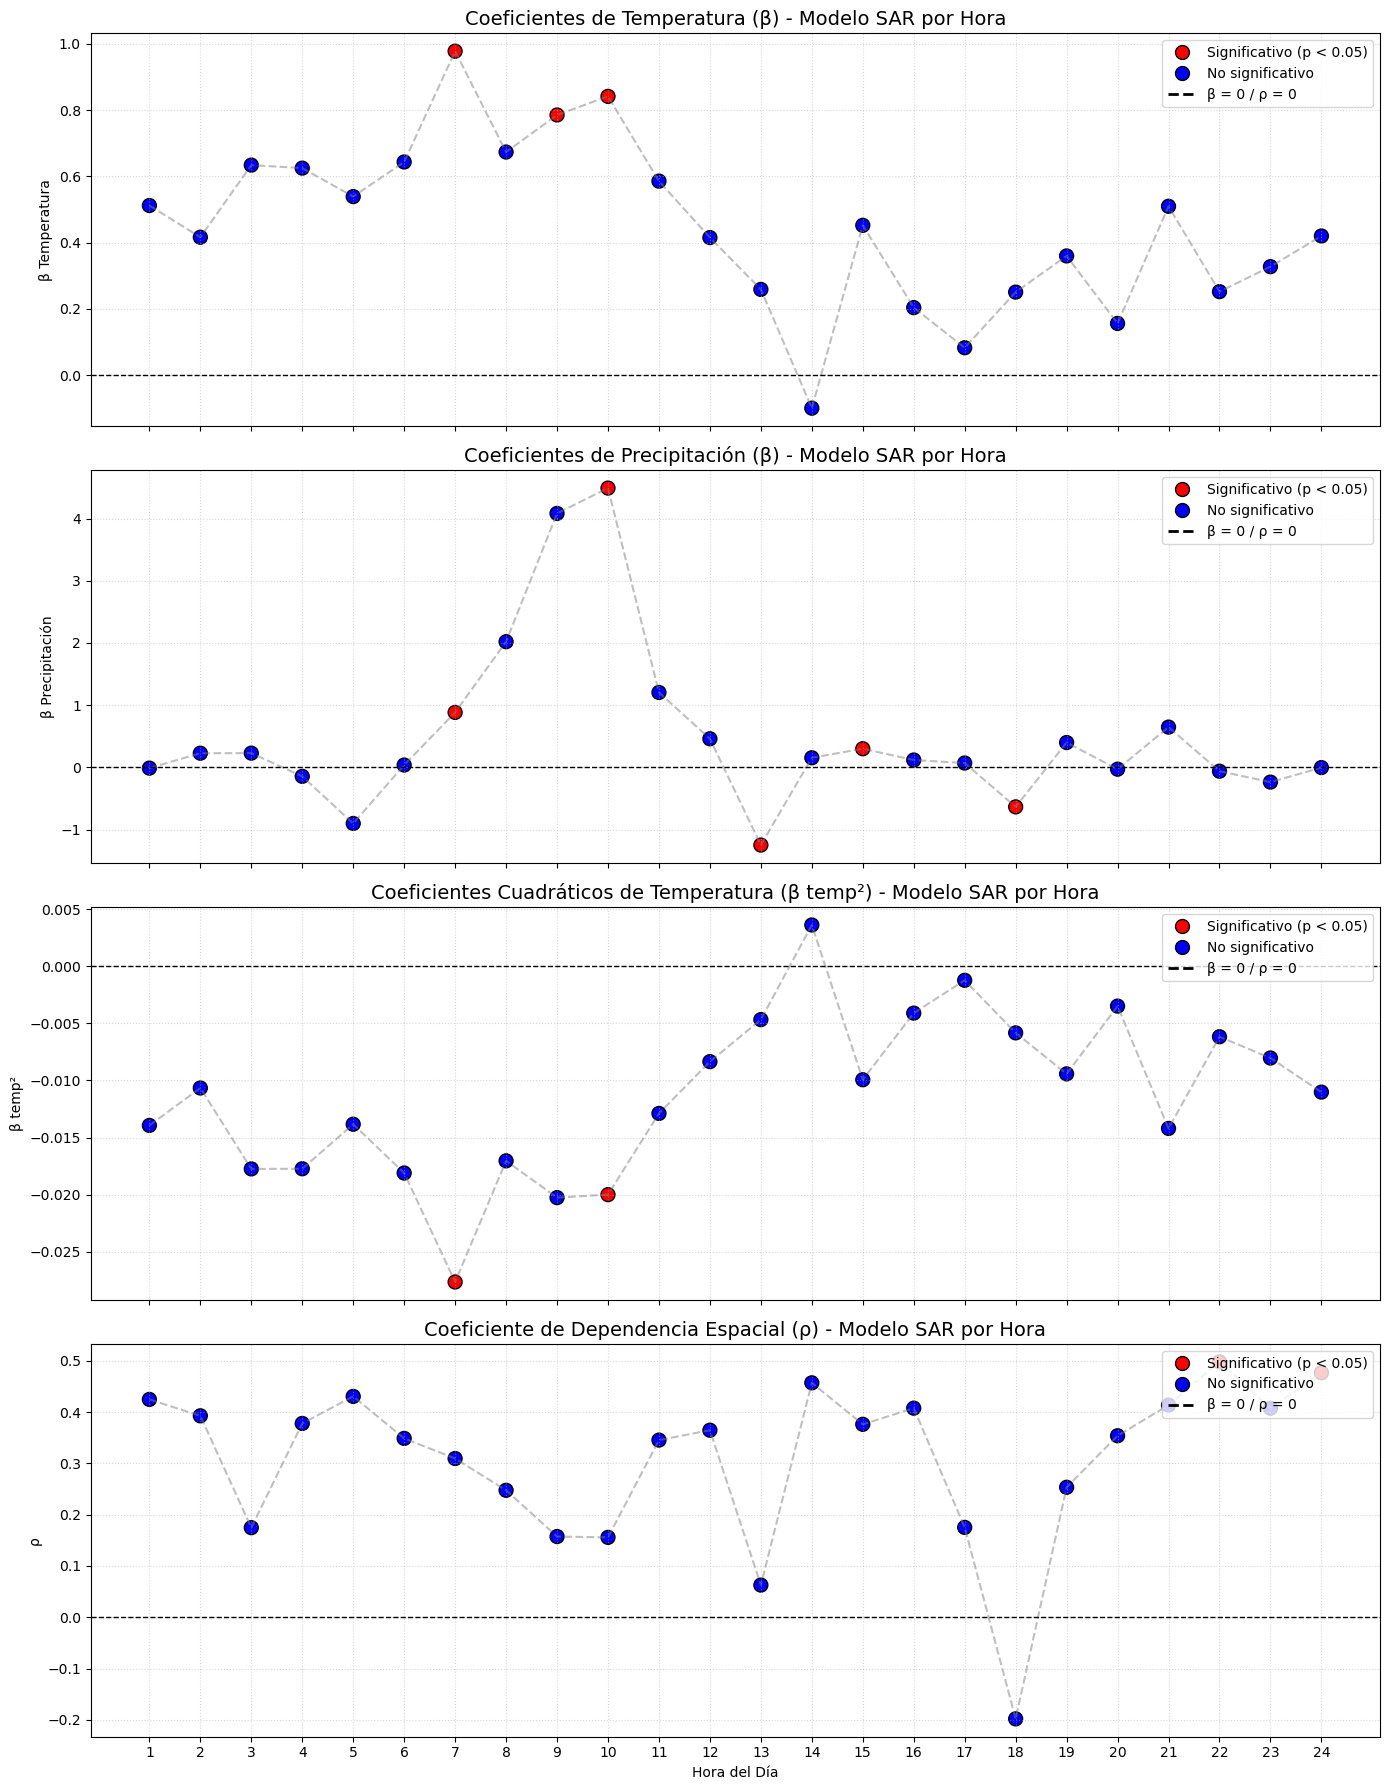

In [93]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 1, figsize=(14, 18), sharex=True)

# --- β Temperatura ---
signif_temp = df_sar['p_temp_sar'] < 0.05
ax[0].scatter(df_sar['hora'], df_sar['beta_temp_sar'],
              c=signif_temp.map({True: 'red', False: 'blue'}),
              edgecolors='k', s=100)
ax[0].plot(df_sar['hora'], df_sar['beta_temp_sar'], color='gray', linestyle='--', alpha=0.5)
ax[0].axhline(0, color='black', linestyle='--', linewidth=1)
ax[0].set_title('Coeficientes de Temperatura (β) - Modelo SAR por Hora', fontsize=14)
ax[0].set_ylabel('β Temperatura')
ax[0].grid(True, linestyle=':', alpha=0.5)

# --- β Precipitación ---
signif_pp = df_sar['p_pp_sar'] < 0.05
ax[1].scatter(df_sar['hora'], df_sar['beta_pp_sar'],
              c=signif_pp.map({True: 'red', False: 'blue'}),
              edgecolors='k', s=100)
ax[1].plot(df_sar['hora'], df_sar['beta_pp_sar'], color='gray', linestyle='--', alpha=0.5)
ax[1].axhline(0, color='black', linestyle='--', linewidth=1)
ax[1].set_title('Coeficientes de Precipitación (β) - Modelo SAR por Hora', fontsize=14)
ax[1].set_ylabel('β Precipitación')
ax[1].grid(True, linestyle=':', alpha=0.5)

# --- β Temperatura² ---
signif_temp2 = df_sar['p_temp2_sar'] < 0.05
ax[2].scatter(df_sar['hora'], df_sar['beta_temp2_sar'],
              c=signif_temp2.map({True: 'red', False: 'blue'}),
              edgecolors='k', s=100)
ax[2].plot(df_sar['hora'], df_sar['beta_temp2_sar'], color='gray', linestyle='--', alpha=0.5)
ax[2].axhline(0, color='black', linestyle='--', linewidth=1)
ax[2].set_title('Coeficientes Cuadráticos de Temperatura (β temp²) - Modelo SAR por Hora', fontsize=14)
ax[2].set_ylabel('β temp²')
ax[2].grid(True, linestyle=':', alpha=0.5)

# --- Coeficiente rho ---
signif_rho = df_sar['p_rho_sar'] < 0.05
ax[3].scatter(df_sar['hora'], df_sar['rho_sar'],
              c=signif_rho.map({True: 'red', False: 'blue'}),
              edgecolors='k', s=100)
ax[3].plot(df_sar['hora'], df_sar['rho_sar'], color='gray', linestyle='--', alpha=0.5)
ax[3].axhline(0, color='black', linestyle='--', linewidth=1)
ax[3].set_title('Coeficiente de Dependencia Espacial (ρ) - Modelo SAR por Hora', fontsize=14)
ax[3].set_xlabel('Hora del Día')
ax[3].set_ylabel('ρ')
ax[3].set_xticks(range(1, 25))
ax[3].grid(True, linestyle=':', alpha=0.5)

# --- Leyenda ---
leyenda = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markeredgecolor='k', markersize=10, label='Significativo (p < 0.05)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markeredgecolor='k', markersize=10, label='No significativo'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label='β = 0 / ρ = 0')
]
for axis in ax:
    axis.legend(handles=leyenda, loc='upper right')

plt.tight_layout()
plt.show()


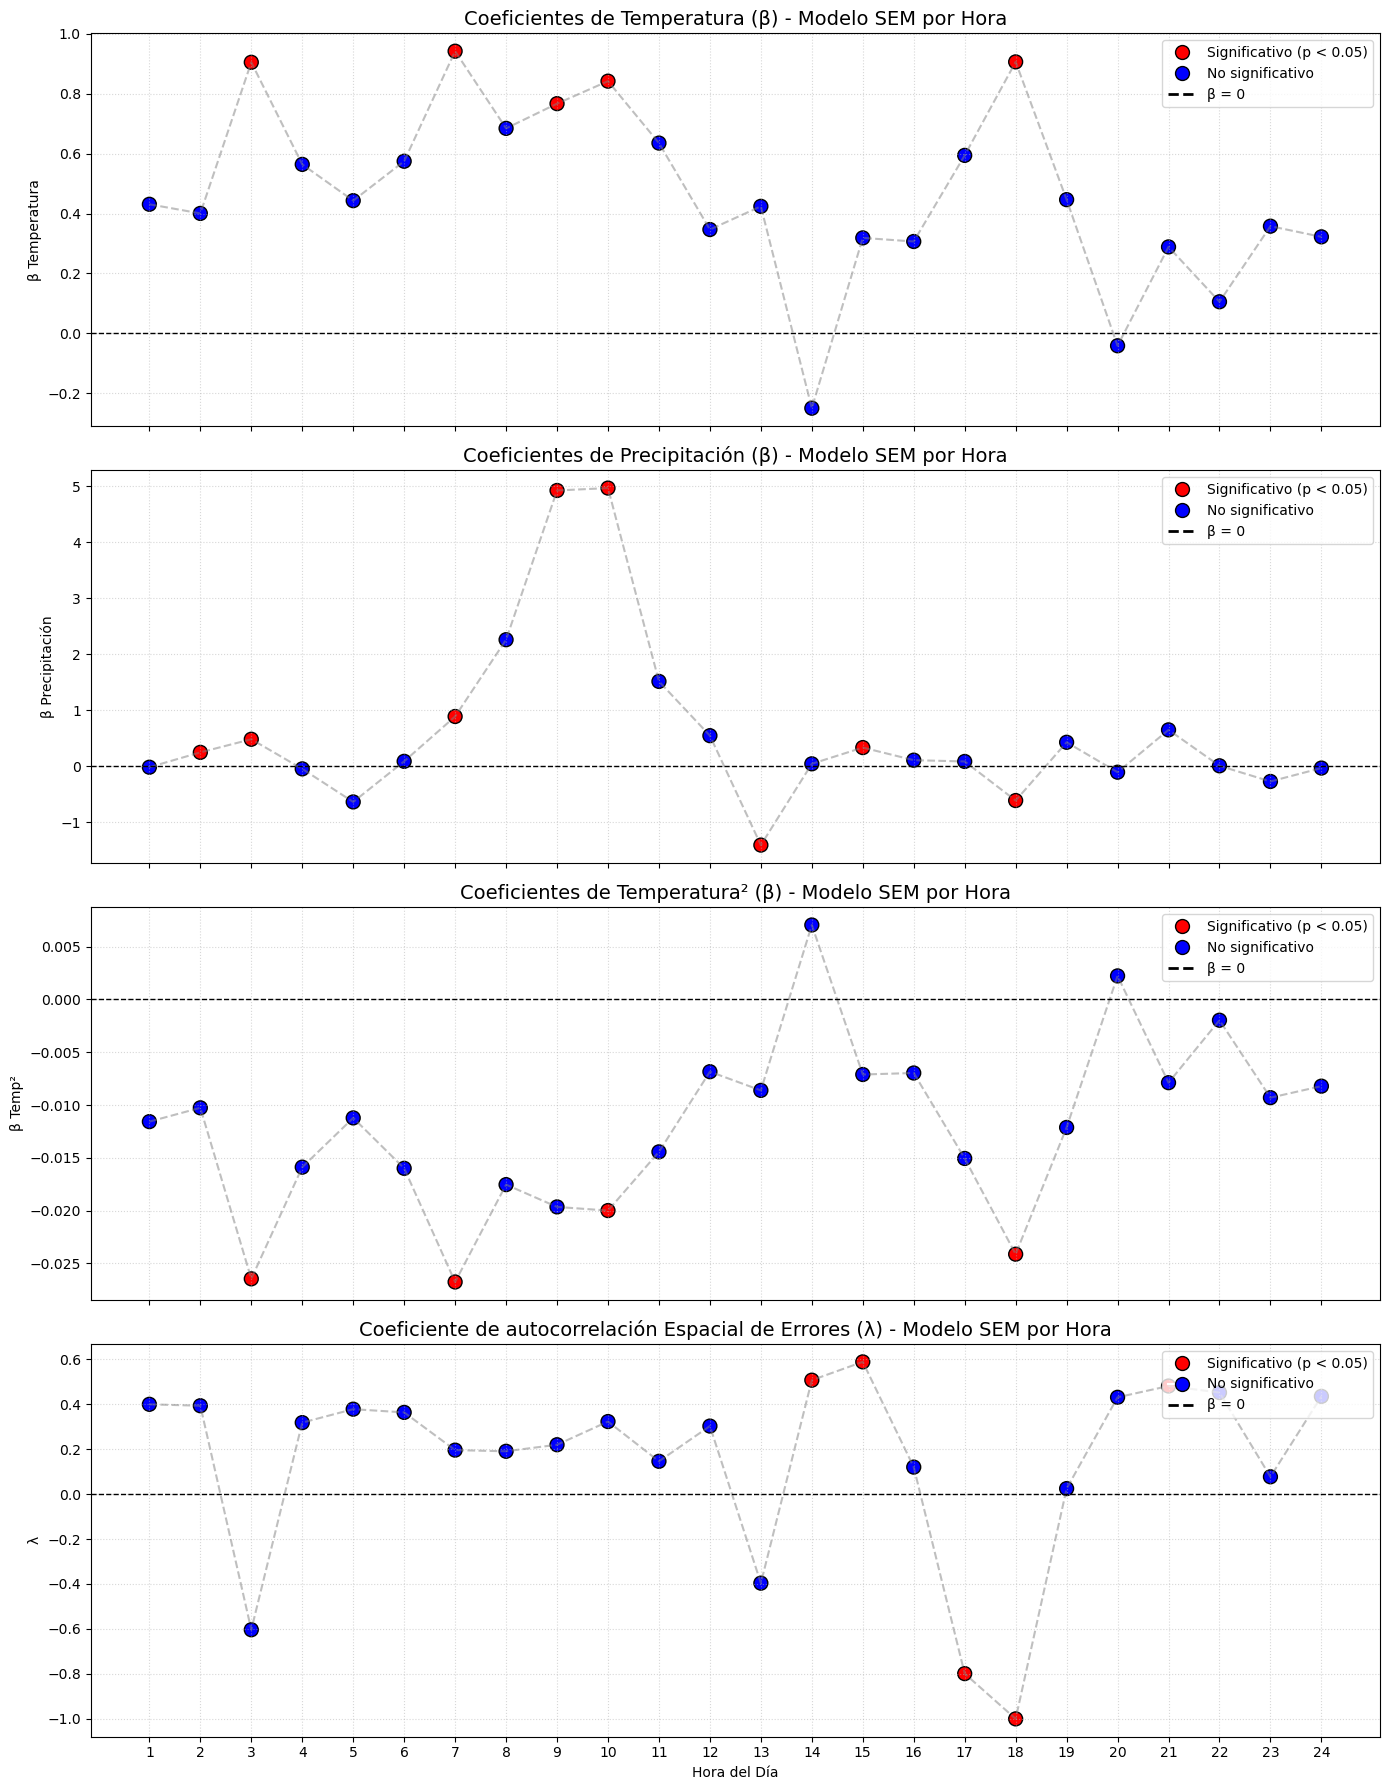

In [114]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Renombrar columnas para graficar
df_car['temp_coef'] = df_car['beta_temp_car']
df_car['temp_pval'] = df_car['p_temp_car']
df_car['pp_coef'] = df_car['beta_pp_car']
df_car['pp_pval'] = df_car['p_pp_car']
df_car['temp2_coef'] = df_car['beta_temp2_car']
df_car['temp2_pval'] = df_car['p_temp2_car']
df_car['rho_pval'] = df_car['p_rho_car']

fig, ax = plt.subplots(4, 1, figsize=(14, 18), sharex=True)

# --- β Temperatura ---
signif_temp = df_car['temp_pval'] < 0.05
ax[0].scatter(df_car['hora'], df_car['temp_coef'],
              c=signif_temp.map({True: 'red', False: 'blue'}),
              edgecolors='k', s=100)
ax[0].plot(df_car['hora'], df_car['temp_coef'], color='gray', linestyle='--', alpha=0.5)
ax[0].axhline(0, color='black', linestyle='--', linewidth=1)
ax[0].set_title('Coeficientes de Temperatura (β) - Modelo SEM por Hora', fontsize=14)
ax[0].set_ylabel('β Temperatura')
ax[0].grid(True, linestyle=':', alpha=0.5)

# --- β Precipitación ---
signif_pp = df_car['pp_pval'] < 0.05
ax[1].scatter(df_car['hora'], df_car['pp_coef'],
              c=signif_pp.map({True: 'red', False: 'blue'}),
              edgecolors='k', s=100)
ax[1].plot(df_car['hora'], df_car['pp_coef'], color='gray', linestyle='--', alpha=0.5)
ax[1].axhline(0, color='black', linestyle='--', linewidth=1)
ax[1].set_title('Coeficientes de Precipitación (β) - Modelo SEM por Hora', fontsize=14)
ax[1].set_ylabel('β Precipitación')
ax[1].grid(True, linestyle=':', alpha=0.5)

# --- β Temperatura² ---
signif_temp2 = df_car['temp2_pval'] < 0.05
ax[2].scatter(df_car['hora'], df_car['temp2_coef'],
              c=signif_temp2.map({True: 'red', False: 'blue'}),
              edgecolors='k', s=100)
ax[2].plot(df_car['hora'], df_car['temp2_coef'], color='gray', linestyle='--', alpha=0.5)
ax[2].axhline(0, color='black', linestyle='--', linewidth=1)
ax[2].set_title('Coeficientes de Temperatura² (β) - Modelo SEM por Hora', fontsize=14)
ax[2].set_ylabel('β Temp²')
ax[2].grid(True, linestyle=':', alpha=0.5)

# --- Coeficiente rho ---
signif_rho = df_car['rho_pval'] < 0.05
ax[3].scatter(df_car['hora'], df_car['rho_car'],
              c=signif_rho.map({True: 'red', False: 'blue'}),
              edgecolors='k', s=100)
ax[3].plot(df_car['hora'], df_car['rho_car'], color='gray', linestyle='--', alpha=0.5)
ax[3].axhline(0, color='black', linestyle='--', linewidth=1)
ax[3].set_title('Coeficiente de autocorrelación Espacial de Errores (λ) - Modelo SEM por Hora', fontsize=14)
ax[3].set_xlabel('Hora del Día')
ax[3].set_ylabel('λ')
ax[3].set_xticks(range(1, 25))
ax[3].grid(True, linestyle=':', alpha=0.5)

# Leyenda compartida
leyenda = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markeredgecolor='k', markersize=10, label='Significativo (p < 0.05)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markeredgecolor='k', markersize=10, label='No significativo'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label='β = 0 ')
]
for axis in ax:
    axis.legend(handles=leyenda, loc='upper right')

plt.tight_layout()
plt.show()
